## **MACHINE LEARNING Y MACHINE LEARNING CUÁNTICO APLICADOS AL MANTENIMIENTO PREDICTIVO DE BOMBAS CENTRIFUGAS**


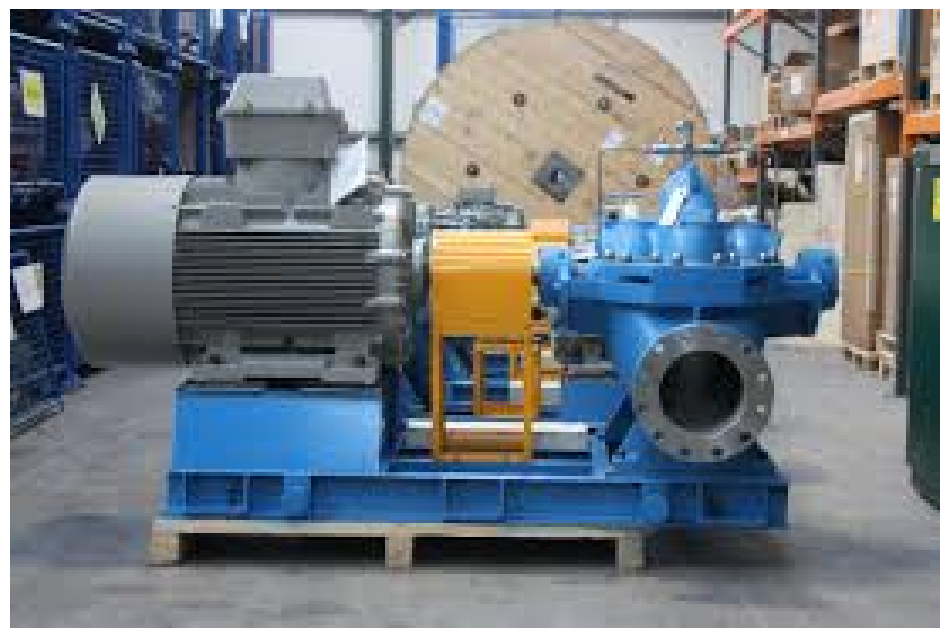

In [ ]:
# @title

import matplotlib.pyplot as plt
import cv2

# Cargar imagen
img = cv2.imread('/content/bomba2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ajustar tamaño de la figura
plt.figure(figsize=(12, 12))  # Cambia los valores para modificar el tamaño
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()



En una planta industrial un **Paro de Planta No Programado**  es una situación en la que una máquina o proceso se detiene de manera inesperada debido a una falla o problema técnico. Son críticos porque generan costos adicionales, como pérdida de producción, costos de reparación, riesgos de seguridad y posibles impactos en la calidad del producto.

**El objetivo de estrategias como el mantenimiento predictivo (PdM)** es precisamente reducir o evitar estos paros no programados mediante el monitoreo constante del estado de las máquinas, permitiendo detectar problemas antes de que causen una interrupción significativa. El mantenimiento predictivo (PdM) aumenta la seguridad y la productividad, disminuye los tiempos de inactividad y reduce los costos operativos.

Los datos históricos que contienen características clave de entrada, salidas estadísticas y algoritmos basados en datos permiten la predicción y detección temprana de fallos. Específicamente, PdM puede reducir los costos de mantenimiento y horas extras en un 20 % y, al mismo tiempo, disminuir el tiempo de inactividad en un 5 %. Además, a través de los hallazgos, una solución PdM puede predecir aproximadamente el 70 % de las fallas y reducir las reparaciones programadas y los costos de mantenimiento hasta en un 12 % y 30 %, respectivamente.**

**Objetivo Principal:**
Lograr maximizar la eficiencia del proceso de mantenimiento de planta, aumentar la fiabilidad y productividad, y en consecuencia, reducir costos de mantenimiento y tiempos de inactividad.
**Objetivo Secundario:**
Presentar el tema de la computación cuántica aplicada al Machine Learning, mediante el desarrollo y evaluación de un algoritmo de red neuronal cuántica.

**Se utilizaron los sensores integrados del kit de monitoreo inteligente de condición FA de Mitsubishi Electric, estos recopilaron 5,118 filas de mediciones que representan las siguientes características clave:**

 **velocidad_ISO**:La variable "velocidad ISO" denota la velocidad de rotación de las bombas centrífugas, medida en mm/s. Altos valores de velocidad suelen indicar desequilibrio o desalineación en el sistema detectado.

 **demodulación_rms** : las mediciones de demodulación son esenciales para detectar fallos tempranos en rodamientos,Las frecuencias identificadas en el espectro de demodulación son útiles para detectar daños en rodamientos de elementos rodantes.

 **aceleración_rms** : La aceleración, que denota la tasa de cambio de la velocidad, también es un indicador clave. Se refiere al cambio de velocidad en función del tiempo y puede indicar defectos en engranajes.

 **aceleración pico a pico**: El valor de pico a pico se refiere a la distancia máxima entre los picos negativo y positivo del espectro de vibración, lo cual indica la intensidad de la vibración y la gravedad del problema detectado.

 **temperaturas de dos bombas centrífugas del mismo fabricante** : La temperatura (°C) también es un indicador vital, ya que, antes de una falla total, la temperatura de una máquina tiende a aumentar rápidamente.

 **Estado** : saludable (FallaID) o propenso a mantenimiento

 **Se desarrolló un modelo de mantenimiento predictivo basado en datos de salud y datos propensos a mantenimiento recopilados de dos bombas centrífugas diferentes, referentes a etapas saludables y propensas a mantenimiento, respectivamente, utilizando técnicas de IA.**


In [ ]:
!pip install tensorflow --quiet
!pip install pennylane torch pandas scikit-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93

In [ ]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader, TensorDataset


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

2.18.0


In [ ]:
df = pd.read_excel("BombasCentrifugas.xlsx")
print(df.head())

   FallaID  velocidad_ISO  demodulación_rms  aceleración_rms  aceleración_PaP  \
0        0       0.349609          0.000343         0.012512          0.04248   
1        0       0.349609          0.000343         0.012512          0.04248   
2        0       0.349609          0.000343         0.012512          0.04248   
3        0       0.349609          0.000343         0.012512          0.04248   
4        0       0.349609          0.000343         0.012512          0.04248   

   temperatura  minuto  segundo   año  mes  dia  hora  
0        24.25      33       41  2022   12    7    12  
1        24.25      33       46  2022   12    7    12  
2        24.25      33       51  2022   12    7    12  
3        24.25      33       56  2022   12    7    12  
4        24.25      34        1  2022   12    7    12  


In [ ]:
# HAY VALORES AUSENTES?
df.isna().sum()

,0
FallaID,0
velocidad_ISO,0
demodulación_rms,0
aceleración_rms,0
aceleración_PaP,0
temperatura,0
minuto,0
segundo,0
año,0
mes,0


In [ ]:
# Características del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FallaID           5114 non-null   int64  
 1   velocidad_ISO     5114 non-null   float64
 2   demodulación_rms  5114 non-null   float64
 3   aceleración_rms   5114 non-null   float64
 4   aceleración_PaP   5114 non-null   float64
 5   temperatura       5114 non-null   float64
 6   minuto            5114 non-null   int64  
 7   segundo           5114 non-null   int64  
 8   año               5114 non-null   int64  
 9   mes               5114 non-null   int64  
 10  dia               5114 non-null   int64  
 11  hora              5114 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 479.6 KB


In [ ]:
#RESGUARDO DATASET ORIGINAL
data = df.copy()
data = data.drop(['minuto', 'segundo', 'año', 'mes', 'dia', 'hora'], axis=1)
print(data)

      FallaID  velocidad_ISO  demodulación_rms  aceleración_rms  \
0           0       0.349609          0.000343         0.012512   
1           0       0.349609          0.000343         0.012512   
2           0       0.349609          0.000343         0.012512   
3           0       0.349609          0.000343         0.012512   
4           0       0.349609          0.000343         0.012512   
...       ...            ...               ...              ...   
5109        1       0.023193          0.000277         0.000637   
5110        1       0.023193          0.000277         0.000637   
5111        1       0.023193          0.000277         0.000637   
5112        1       0.023193          0.000277         0.000637   
5113        1       0.023193          0.000277         0.000637   

      aceleración_PaP  temperatura  
0            0.042480        24.25  
1            0.042480        24.25  
2            0.042480        24.25  
3            0.042480        24.25  
4         

# **ANÁLISIS EXPLORATORIO DE DATOS**

In [ ]:
# Combinar columnas en un timestamp
# Renombrar columnas al inglés
df = df.rename(columns={
    'año': 'year',
    'mes': 'month',
    'dia': 'day',
    'hora': 'hour',
    'minuto': 'minute',
    'segundo': 'second'
})

df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])

In [ ]:
df

,FallaID,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura,minute,second,year,month,day,hour,timestamp
0,0,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12,2022-12-07 12:33:41
1,0,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12,2022-12-07 12:33:46
2,0,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12,2022-12-07 12:33:51
3,0,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12,2022-12-07 12:33:56
4,0,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12,2022-12-07 12:34:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,1,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15,2022-12-14 15:11:47
5110,1,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15,2022-12-14 15:11:52
5111,1,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15,2022-12-14 15:11:57
5112,1,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15,2022-12-14 15:12:02


Text(0, 0.5, 'Temperatura')

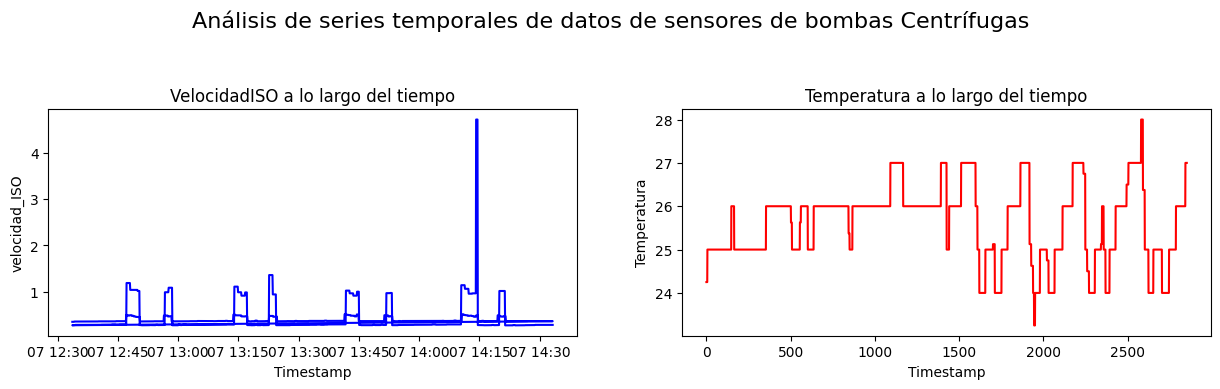

In [ ]:
# Plot de series temporales para cada sensor
plt.figure(figsize=(15, 10))
plt.suptitle('Análisis de series temporales de datos de sensores de bombas Centrífugas', fontsize=16)
#Filtrar para muesras sin falla para un día específico para ver la tendencias"
df_filtrado = df[df['FallaID'] == 0]
df_filtrado = df[df['day'] == 7]

# VelocidadISO
plt.subplot(3, 2, 1)
plt.plot(df_filtrado['timestamp'], df_filtrado['velocidad_ISO'], color='blue')  # Asumiendo columna 'timestamp'
#plt.plot(df['velocidad_ISO'], color='blue')
plt.title('VelocidadISO a lo largo del tiempo')
plt.xlabel('Timestamp')
plt.ylabel('velocidad_ISO')

# Temperature
plt.subplot(3, 2, 2)
plt.plot(df_filtrado['temperatura'], color='red')
plt.title('Temperatura a lo largo del tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Temperatura')

**En el gráfico de la izquierda se observa que la mayor parte del tiempo los valores son bajos, pero hay picos repentinos.
Los picos podrían indicar anomalías en el funcionamiento, como desequilibrio, cavitación o fallas en los rodamientos.Cambios bruscos en la temperatura podría indicar problemas como desgaste de cojinetes, fricción excesiva o falta de lubricación.Este análisis de datos puede ayudar en mantenimiento predictivo, ya que permite detectar patrones anómalos antes de que ocurra una falla grave.**

Text(0, 0.5, 'aceleración pico a pico')

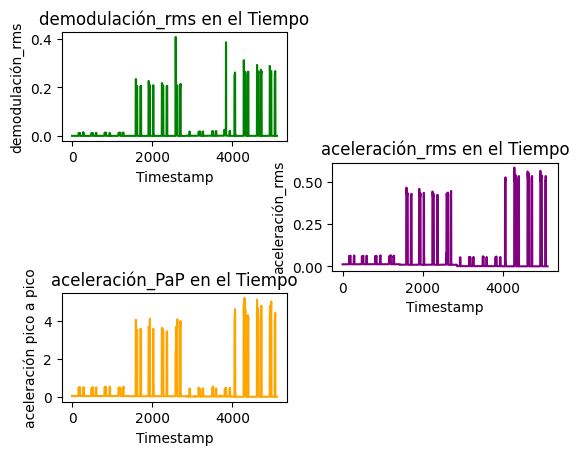

In [ ]:
# demodulación_rms
plt.subplot(3, 2, 1)
plt.plot(df['demodulación_rms'], color='green')
plt.title('demodulación_rms en el Tiempo')
plt.xlabel('Timestamp')
plt.ylabel('demodulación_rms')

# aceleración_rms
plt.subplot(3, 2, 4)
plt.plot(df['aceleración_rms'], color='purple')
plt.title('aceleración_rms en el Tiempo')
plt.xlabel('Timestamp')
plt.ylabel('aceleración_rms')

# aceleración Pico a Pico
plt.subplot(3, 2, 5)
plt.plot(df['aceleración_PaP'], color='orange')
plt.title('aceleración_PaP en el Tiempo')
plt.xlabel('Timestamp')
plt.ylabel('aceleración pico a pico')


**Este gráfico es sobre el dataset completo muestra indicadores de vibración de una bomba centrífuga a lo largo del tiempo.**

1. Demodulación_RMS: Muestra la demodulación de la señal RMS (Root Mean Square-Raíz cuadrática media), que se usa para detectar impactos pequeños en los rodamientos antes de que sean evidentes en otros indicadores.

2. Aceleración RMS: Representa la aceleración promedio de las vibraciones en un tiempo dado.

3. Aceleración Pico a Pico: Mide la diferencia entre el valor máximo y mínimo de la aceleración en un período de tiempo.

 Es útil para detectar impactos bruscos o golpes en la estructura, que pueden ser síntomas de rodamientos dañados, cavitación o desbalanceo.Aquí se observan varios picos, lo que sugiere momentos en los que la máquina experimentó golpes mecánicos significativos a tener en cuenta.

In [ ]:
df = df.drop(['minute','second','year','month','day','hour'], axis=1)

In [ ]:
df

,FallaID,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura,timestamp
0,0,0.349609,0.000343,0.012512,0.042480,24.25,2022-12-07 12:33:41
1,0,0.349609,0.000343,0.012512,0.042480,24.25,2022-12-07 12:33:46
2,0,0.349609,0.000343,0.012512,0.042480,24.25,2022-12-07 12:33:51
3,0,0.349609,0.000343,0.012512,0.042480,24.25,2022-12-07 12:33:56
4,0,0.349609,0.000343,0.012512,0.042480,24.25,2022-12-07 12:34:01
...,...,...,...,...,...,...,...
5109,1,0.023193,0.000277,0.000637,0.006409,23.00,2022-12-14 15:11:47
5110,1,0.023193,0.000277,0.000637,0.006409,23.00,2022-12-14 15:11:52
5111,1,0.023193,0.000277,0.000637,0.006409,23.00,2022-12-14 15:11:57
5112,1,0.023193,0.000277,0.000637,0.006409,23.00,2022-12-14 15:12:02


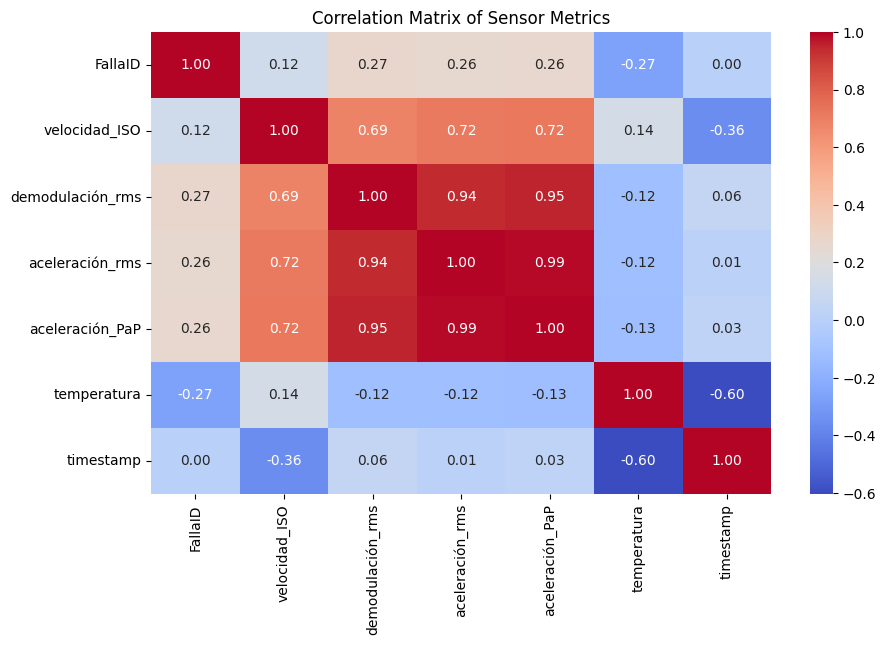

In [ ]:
# Análisis de Correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sensor Metrics')
plt.show()

# Detección de anomalías usando PCA
# Standardize the data
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df.drop(columns=['FallaID']))



Este mapa de calor muestra la correlación entre las diferentes métricas de sensores.
Interpretación de correlaciones clave:
FallaID vs. otras variables:

Demodulación RMS (0.27), Aceleración RMS (0.26) y Aceleración Pico a Pico (0.26) tienen una correlación moderada con la aparición de fallas. Esto sugiere que un aumento en estas métricas podría estar relacionado con fallas mecánicas.

Temperatura (-0.27) tiene una correlación negativa, lo que podría indicar que las fallas ocurren cuando la temperatura es más baja. Esto es algo inusual y merece más análisis.

Velocidad ISO vs. Demodulación RMS, Aceleración RMS y Aceleración PaP (~0.7 a 0.72):

La velocidad de la bomba está altamente correlacionada con los niveles de vibración. Un aumento en velocidad puede incrementar las vibraciones, lo que puede provocar fallas.

Demodulación RMS vs. Aceleración RMS (0.94) y Aceleración Pico a Pico (0.95):

Estas métricas de vibración están fuertemente relacionadas. Si una aumenta, las otras también lo hacen, lo que sugiere que pueden ser indicadores clave de fallas en desarrollo.

Temperatura y Timestamp (-0.60):

Esto indica que la temperatura ha disminuido con el tiempo.

Conclusión
Las vibraciones (Aceleración RMS, Aceleración PaP y Demodulación RMS) parecen ser indicadores clave de fallas.

 **Se debe recomendar el monitoreo de estos valores en tiempo real y aplicar Machine Learning para detección de anomalías y por tanto, predicción de fallas**


In [ ]:
dflabel = df.pop('FallaID')

In [ ]:
df = df.drop(['timestamp'], axis=1)


In [ ]:
df

,FallaID,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura,minuto,segundo,año,mes,dia,hora
0,0,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12
1,0,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12
2,0,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12
3,0,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12
4,0,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5109,1,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15
5110,1,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15
5111,1,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15
5112,1,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15


**El análisis de componentes principales (PCA) es un método estadístico que se utiliza en machine learning para reducir la dimensionalidad de los datos. Esto ayuda a mejorar la visualización de los datos. Extrae las características más informativas de grandes conjuntos de datos y
Conserva la información más relevante del conjunto de datos inicial**

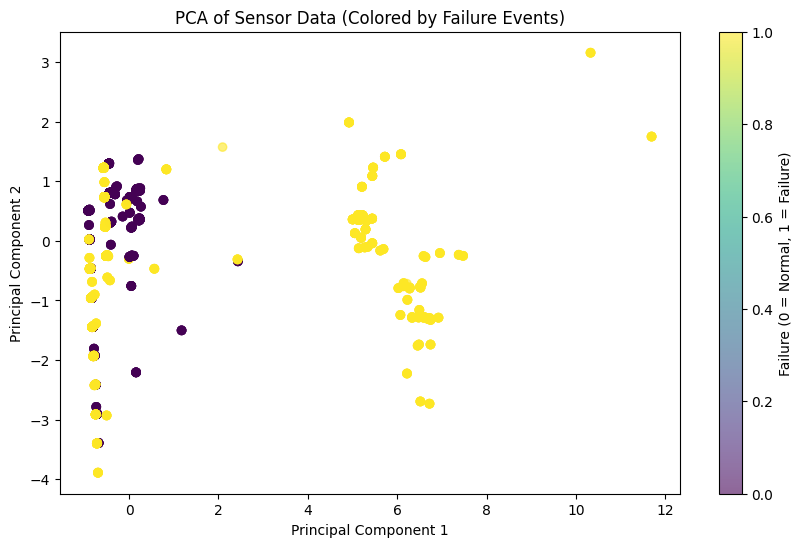

In [ ]:
# Apply PCA
# Standardize the data
scaler = StandardScaler()

#scaled_data = scaler.fit_transform(df.drop('FallaID')
scaled_data = scaler.fit_transform(df)



pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot PCA results
plt.figure(figsize=(10, 6))
#plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['temperatura'], cmap='viridis', alpha=0.6)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dflabel, cmap='viridis', alpha=0.6)
plt.colorbar(label='Failure (0 = Normal, 1 = Failure)')
plt.title('PCA of Sensor Data (Colored by Failure Events)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

El gráfico generado es una visualización en 2D de datos de sensores después de aplicar Análisis de Componentes Principales (PCA). Aquí los detalles clave:

Puntos: Cada punto representa una observación de los datos de sensores, proyectada en las dos componentes principales.
segun la etiqueta:
Azul/Verde (0): Operación normal.
Amarillo (1): Evento de falla.
Interpretación Agrupamientos:
Si los puntos amarillos (fallas) se concentran en una zona específica, sugiere que las variables de sensores tienen un patrón detectable asociado a fallos.
Si los puntos azules (normales) y amarillos están mezclados,
**indica que las dos componentes principales no logran separar claramente los estados normales y fallidos.**

**Conclusiones** : gran parte del set de datos hay separación clara entre colores, así, las variables de sensores son útiles para predecir fallos.
También se observa que hay solapamiento en ciertos sectores, por tanto, se necesitan más componentes, mejores características o técnicas avanzadas como por ejemplo: t-SNE.

# **t-SNE (T-distributed Stochastic Neighbor Embedding)**
Es una técnica de aprendizaje automático que se utiliza para explorar y comprender conjuntos de datos complejos.
Permite reducir la dimensionalidad del dataset y visualizarlo en 2D y 3D. El propósito es observar cómo se distribuyen los datos y si hay patrones o separaciones claras entre ellos y así, determinar si los datos contienen señales relevantes para el mantenimiento predictivo.


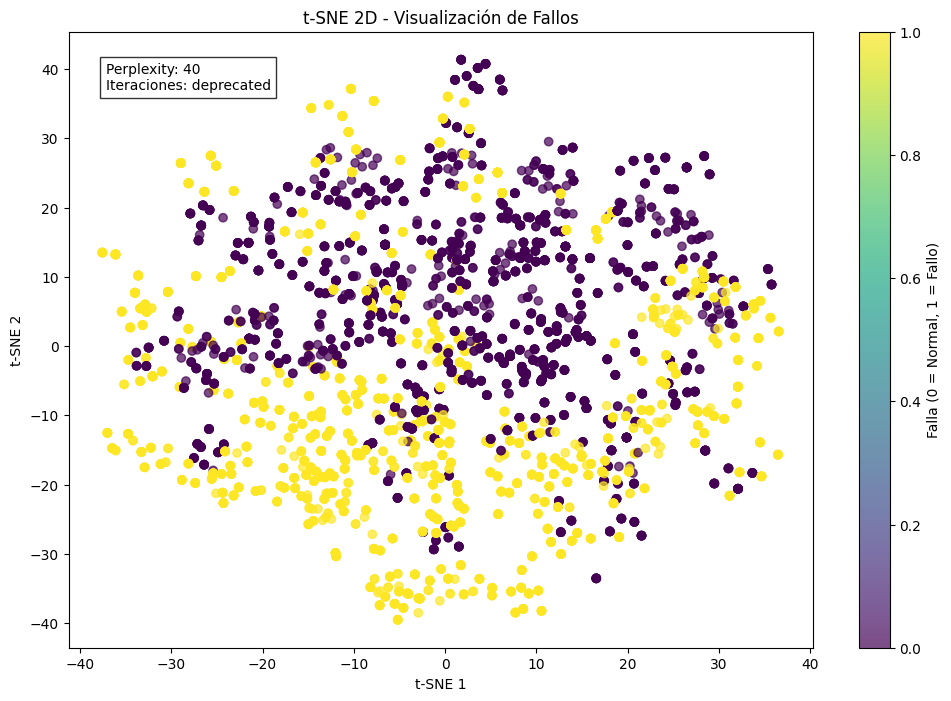

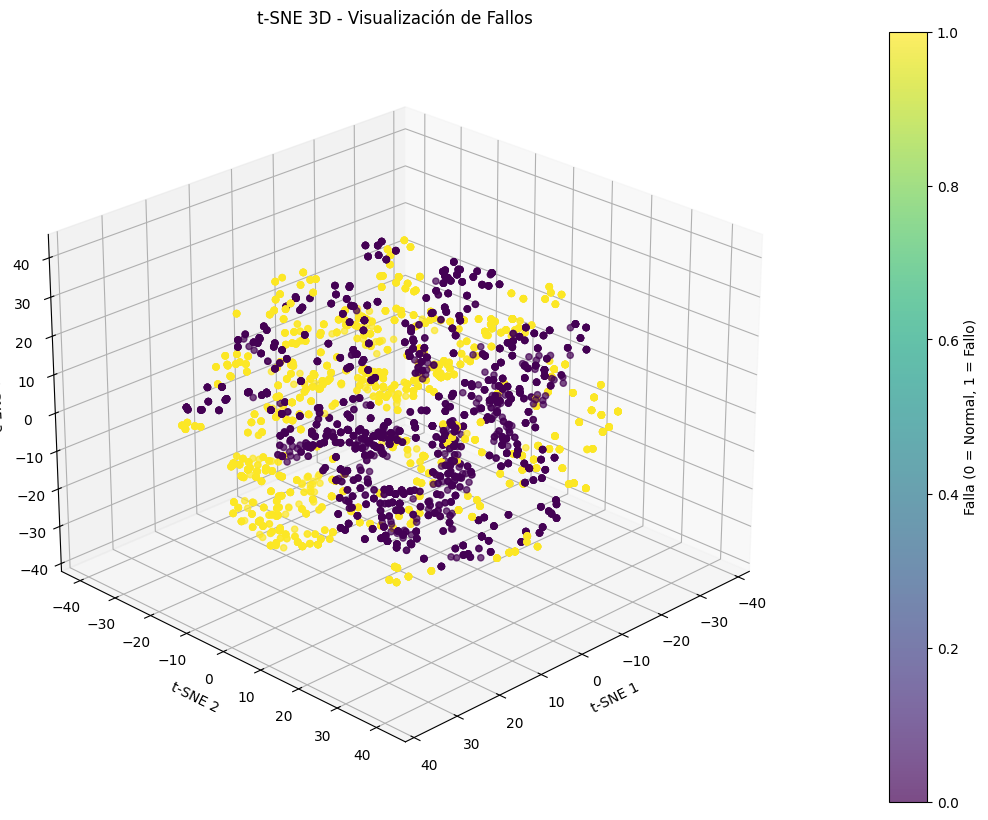

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


# Preprocesamiento
X=df #datasets sin etiquetas
y =dflabel # Etiquetas

# Estandarización (crítico para t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configuración t-SNE
tsne = TSNE(n_components=3,  #  Se proyecta en 3 dimensiones para la visualización 3D.
            perplexity=40,   # define cómo se equilibran distancias locales y globales,está relacionada
                              #con el número de vecinos más cercanos que se utiliza en otros algoritmos
            random_state=42)  #Determina el generador de números aleatorios. elegir un entero para obtener resultados reproducibles-



# Aplicar t-SNE
X_tsne = tsne.fit_transform(X_scaled)

# ------------------------------------------
# Visualización 2D
# ------------------------------------------
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Falla (0 = Normal, 1 = Fallo)')
plt.title('t-SNE 2D - Visualización de Fallos')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Añadir anotación de varianza (explicativa)
plt.text(0.05, 0.95, f'Perplexity: {tsne.perplexity}\nIteraciones: {tsne.n_iter}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# ------------------------------------------
# Visualización 3D
# ------------------------------------------
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter_3d = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2],
                       c=y, cmap='viridis', alpha=0.7, depthshade=True)

ax.set_title('t-SNE 3D - Visualización de Fallos')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')

# Leyenda de color
cbar = fig.colorbar(scatter_3d, pad=0.1)
cbar.set_label('Falla (0 = Normal, 1 = Fallo)')

# Ángulo de visualización
ax.view_init(elev=25, azim=45)  # Ajustable según necesidad

plt.show()

**Un modelo de ML correcto podría encontrar patrones en
dimensiones superiores que PCA y  t-SNE no pudo mostrar. Por ejemplo las redes neuronales tienen una gran capacidad de aprendizaje no lineal, lo que les permite encontrar estructuras en los datos que una técnica de reducción de dimensionalidad no detecta fácilmente.**

# **MACHINE LEARNING**

In [ ]:
data

,FallaID,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
0,0,0.349609,0.000343,0.012512,0.042480,24.25
1,0,0.349609,0.000343,0.012512,0.042480,24.25
2,0,0.349609,0.000343,0.012512,0.042480,24.25
3,0,0.349609,0.000343,0.012512,0.042480,24.25
4,0,0.349609,0.000343,0.012512,0.042480,24.25
...,...,...,...,...,...,...
5109,1,0.023193,0.000277,0.000637,0.006409,23.00
5110,1,0.023193,0.000277,0.000637,0.006409,23.00
5111,1,0.023193,0.000277,0.000637,0.006409,23.00
5112,1,0.023193,0.000277,0.000637,0.006409,23.00


In [ ]:
df

,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
0,0.349609,0.000343,0.012512,0.042480,24.25
1,0.349609,0.000343,0.012512,0.042480,24.25
2,0.349609,0.000343,0.012512,0.042480,24.25
3,0.349609,0.000343,0.012512,0.042480,24.25
4,0.349609,0.000343,0.012512,0.042480,24.25
...,...,...,...,...,...
5109,0.023193,0.000277,0.000637,0.006409,23.00
5110,0.023193,0.000277,0.000637,0.006409,23.00
5111,0.023193,0.000277,0.000637,0.006409,23.00
5112,0.023193,0.000277,0.000637,0.006409,23.00


In [ ]:
# DEFINIR CONJUNTO DE ENTRENAMIENTO 80% Y CONJUNTO DE TEST 20%  PARA TOMAR LA MUESTRA ALEATORIA
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
train_dataset = data.sample(frac=0.8,random_state=0) # investigar parametro random (garantizar la reproducibilidad)
test_dataset = data.drop(train_dataset.index)
print(train_dataset.index)

Index([  42, 1505,  311, 2863,  567, 2436,  725, 4024, 4847,  666,
       ...
       1143, 2643,  172, 3727, 3863, 1876, 2654, 3296,  814, 2256],
      dtype='int64', length=4091)


El parámetro random_state se utiliza para asegurar la reproducibilidad del muestreo aleatorio.

  Al establecer un valor como random_state=0, garantizas que:

Tú o cualquier otra persona que ejecute el mismo código, obtendrá los mismos datos de entrenamiento.

Es útil en contextos de pruebas, validación de modelos o cuando se escriben documentos científicos o informes.

In [ ]:
print(train_dataset)

      FallaID  velocidad_ISO  demodulación_rms  aceleración_rms  \
42          0       0.355469          0.000338         0.012695   
1505        1       0.285156          0.000233         0.010193   
311         0       0.361328          0.000319         0.012878   
2863        0       0.034668          0.000751         0.001656   
567         0       0.363281          0.000324         0.012939   
...       ...            ...               ...              ...   
1876        1       0.287109          0.000236         0.010315   
2654        1       0.275391          0.000229         0.009888   
3296        0       0.029175          0.000580         0.001564   
814         0       0.500000          0.012695         0.058105   
2256        1       0.964844          0.203125         0.414062   

      aceleración_PaP  temperatura  
42           0.043213         25.0  
1505         0.034424         26.0  
311          0.044189         25.0  
2863         0.020020         18.0  
567       

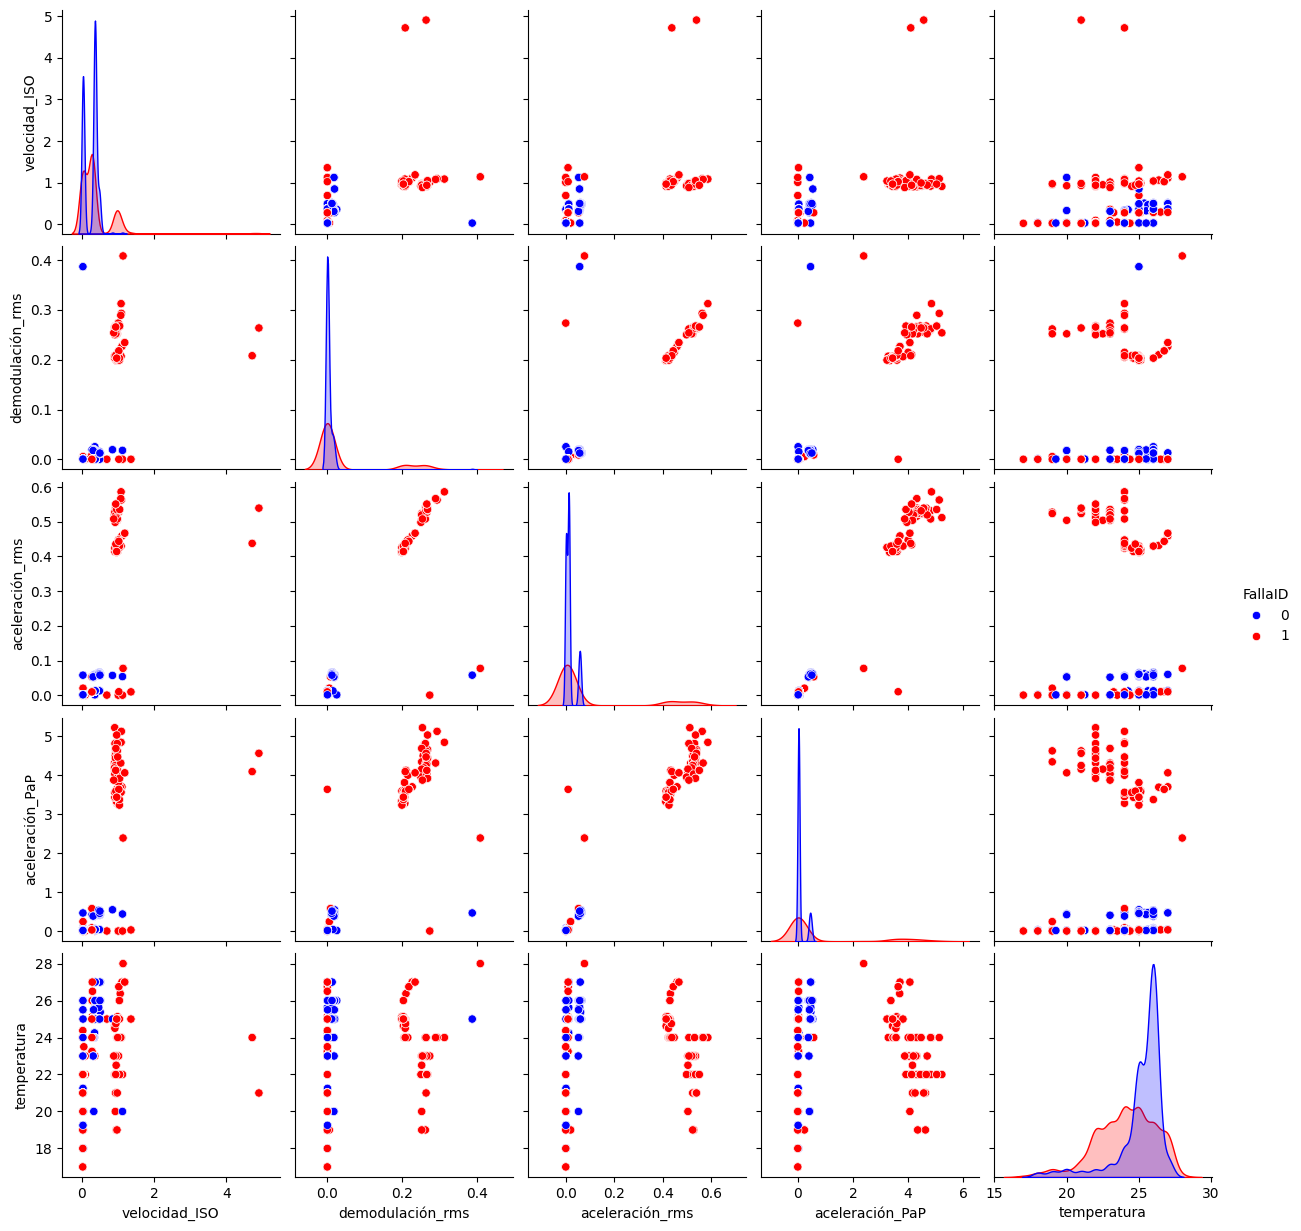

In [ ]:
#DISTRIBUCIÓN CONJUNTA DE ALGUNAS DE LAS CARACTERÍSTICAS DEL DATASET
#sns.pairplot crea una matriz de gráficos de dispersión que muestra las relaciones entre cada par de variables en los datos seleccionados.
sns.pairplot(train_dataset[['FallaID','velocidad_ISO','demodulación_rms','aceleración_rms','aceleración_PaP','temperatura']],
             diag_kind="kde", hue="FallaID", palette={0: "blue", 1: "red"})

In [ ]:
# VER LOS ESTADÍSTICOS
train_stats = train_dataset.describe()
train_stats.pop('FallaID')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
velocidad_ISO,4091.0,0.296298,0.351743,0.021118,0.030640,0.283203,0.365234,4.906251
demodulación_rms,4091.0,0.022577,0.068933,0.000209,0.000248,0.000324,0.000839,0.408203
aceleración_rms,4091.0,0.049960,0.129584,0.000546,0.001602,0.010132,0.013000,0.585938
aceleración_PaP,4091.0,0.396099,1.099311,0.005432,0.020264,0.034668,0.044434,5.218750
temperatura,4091.0,24.580298,1.947006,17.000000,24.000000,25.000000,26.000000,28.000000


In [ ]:
# CORTAR LA CARACTERÍSTICA machine_ID DEL DATASET DE ENTRENAMIENTO Y TEST Y GUARDAR EN VARIABLE NUEVA
train_labels = train_dataset.pop('FallaID')
test_labels = test_dataset.pop('FallaID')


In [ ]:
train_labels

,FallaID
42,0
1505,1
311,0
2863,0
567,0
...,...
1876,1
2654,1
3296,0
814,0


In [ ]:
# FUNCIÓN PARA ESTANDARIZAR VARIABLES
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data

,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
42,0.168222,-0.322628,-0.287573,-0.321007,0.215563
1505,-0.031676,-0.324150,-0.306885,-0.329002,0.729172
311,0.184880,-0.322905,-0.286160,-0.320119,0.215563
2863,-0.743809,-0.316624,-0.372767,-0.342105,-3.379702
567,0.190432,-0.322822,-0.285689,-0.320119,0.729172
...,...,...,...,...,...
1876,-0.026123,-0.324109,-0.305943,-0.328336,1.242781
2654,-0.059439,-0.324206,-0.309240,-0.329890,0.215563
3296,-0.759426,-0.319114,-0.373473,-0.341439,-0.298047
814,0.579122,-0.143357,0.062856,0.108728,0.729172


In [ ]:
normed_test_data

,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
0,0.151564,-0.322545,-0.288986,-0.321673,-0.169644
7,0.168222,-0.322684,-0.288515,-0.321895,0.215563
16,0.168222,-0.322628,-0.288044,-0.321895,0.215563
21,0.168222,-0.322601,-0.287573,-0.320563,0.215563
24,0.168222,-0.322601,-0.287573,-0.321229,0.215563
...,...,...,...,...,...
5097,-0.768449,-0.323486,-0.380744,-0.354653,-0.811656
5099,-0.768449,-0.323486,-0.380744,-0.354653,-0.811656
5100,-0.768449,-0.323486,-0.380744,-0.354653,-0.811656
5105,-0.769491,-0.323541,-0.380833,-0.354570,-0.811656


**Para analizar el costo-beneficio basado en la matriz de confusión, primero identificamos los casos con ejemplos:**

•	Verdaderos Positivos (VP = 492): La bomba es propensa a refacción y el modelo la clasifica correctamente.

•	Falsos Positivos (FP = 64): La bomba es óptima, pero el modelo la clasifica como propensa a refacción.

•	Falsos Negativos (FN = 21): La bomba es propensa a refacción, pero el modelo la clasifica como óptima.

•	Verdaderos Negativos (VN = 446): La bomba es óptima y el modelo la clasifica correctamente.

 **Costos y Beneficios Asociados**
1.	Falsos Negativos (FN = 21) → Costo alto
-Estas bombas necesitan refacción, pero el modelo las considera saludables.
-Costo asociado: Daños en la producción, pérdidas económicas, costos de reparación urgentes.
-Costo informado por la empresa : $50,000 por cada bomba mal clasificada.

Costo total FN = 21 × 50,000 = $---

2.	Falsos Positivos (FP = 64) → Costo medio
-Bombas en buen estado enviadas innecesariamente a mantenimiento.
-Costo asociado: Gastos innecesarios en mantenimiento y piezas.
-Costo informado por la empresa: $10,000 por cada bomba mal clasificada.

Costo total FP = 64 × 10,000 = $---

3.	Verdaderos Positivos (VP = 492) → Beneficio alto

  -El modelo detecta correctamente las bombas que requieren refacción, evitando fallos inesperados.
  -Beneficio asociado: Prevención de pérdidas y reducción de costos operativos.
  -Beneficio informado por la empresa: $30,000 por cada bomba correctamente clasificada.

  Beneficio total VP = 492× 30,000 = $---

4.	Verdaderos Negativos (VN = 438) → Beneficio medio
-El modelo evita reparaciones innecesarias y reduce gastos de mantenimiento.
-Beneficio asociado: Reducción de costos por revisiones innecesarias.
-Beneficio informado por la empresa: $5,000 por cada bomba correctamente clasificada.

-Beneficio total VN = 446 × 5,000 = ---

# **MATRIZ DE CONFUSIÓN , MATRIZ DE VALORACIÓN y valor que aporta nuestro modelo (techo y Piso)**

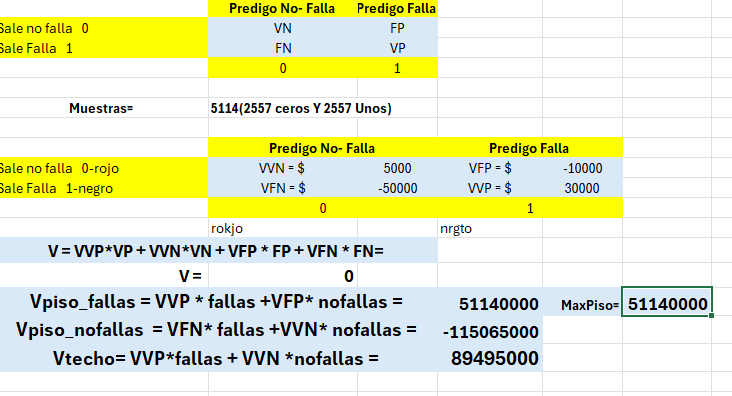

**Utilizamos REDES NEURONALES: CLASIFICADORAS**

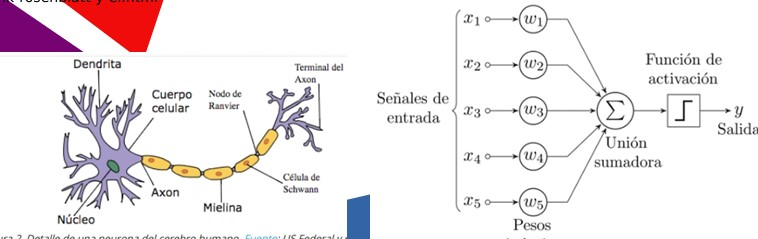

Usamos función de activación en la capa de salida ya que la red es para clasificación.

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(65, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Activación sigmoide para salida binaria
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # Pérdida para clasificación binaria
        metrics=['accuracy']  # Métricas de evaluación
    )
    return model

In [ ]:
# INSTANCIAR MODELO
model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# COMPROBAR MODELO
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 65)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,535 (9.90 KB)

 Trainable params: 2,535 (9.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#ENTRENAMIENTO

#CLASE PARA MOSTRAR PUNTOS EN ENTRENAMIENTO
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
# El parámetro de paciencia es la cantidad de épocas que se deben verificar para detectar mejoras.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[early_stop, PrintDot()])

Epoch 1/500
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.6296
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7067 - loss: 0.6277 - val_accuracy: 0.7082 - val_loss: 0.5437
Epoch 2/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7414 - loss: 0.5274 - val_accuracy: 0.7961 - val_loss: 0.4688
Epoch 3/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8302 - loss: 0.4416 - val_accuracy: 0.9206 - val_loss: 0.3803
Epoch 4/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9031 - loss: 0.3623 - val_accuracy: 0.9145 - val_loss: 0.3017
Epoch 5/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9128 - loss: 0.2870 - val_accuracy: 0.9096 - val_loss: 0.2645
Epoch 6/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9129 - loss: 0.2396 - val_accuracy: 0.9182 - val_loss: 0.2131
Epoch 7/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9194 - loss: 0.2071 - val_accuracy: 0.9121 - val_loss: 0.1953
Epoch 8/500
103/103 ━━

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# VER UNA PARTE DEL HISTORIAL DEL ENTRENAMIENTO
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,accuracy,loss,val_accuracy,val_loss,epoch
15,0.921760,0.160177,0.924298,0.155796,15
16,0.920844,0.159178,0.925519,0.153238,16
17,0.923289,0.156389,0.925519,0.155708,17
18,0.919927,0.155443,0.918193,0.157386,18
19,0.919315,0.154915,0.923077,0.154462,19


In [ ]:
hist.head()

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.692237,0.599545,0.706960,0.563780,0
1,0.736553,0.524541,0.710623,0.487357,1
2,0.853606,0.428630,0.920635,0.372987,2
3,0.911980,0.319233,0.912088,0.275893,3
4,0.914731,0.247144,0.915751,0.221121,4


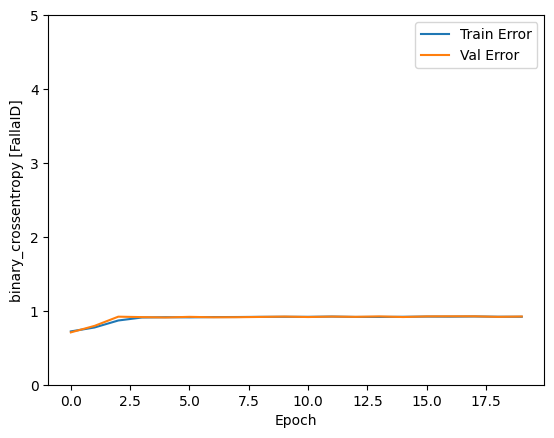

In [ ]:
# GRAFICAR LA EVOLUCIÓN DE LAS MÉTRICAS DEL MODELO VS ÉPOCAS (ITERACIONES)
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('binary_crossentropy [FallaID]')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()


  plt.show()


plot_history(history)


In [ ]:
# CALCULAR Y MOSTRAR LAS MÉTRICAS USADAS PARA EVALUAR EL MODELO

loss, mae = model.evaluate(normed_test_data, test_labels, verbose=3)
loss , mae


(0.14722082018852234, 0.9169110655784607)

In [ ]:
#Predicción

test_predictions = model.predict(normed_test_data).flatten()

# Convertir probabilidades a clases binarias mayor 0.5 será 1 de lo contrario 0
binary_predictions = (test_predictions > 0.5).astype(int) #necesario porque no puede comparar etiquetas entera con predicc float


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
binary_predictions[0:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

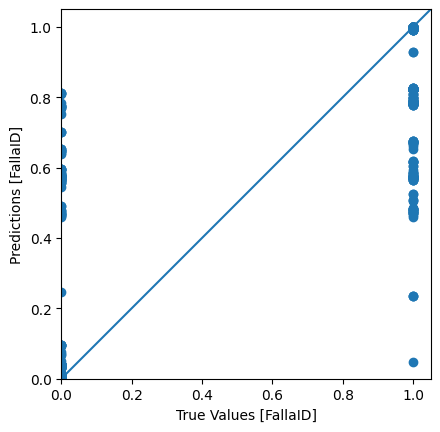

In [ ]:
#Graficamos con predicciones (float) y las predicciones binarias (0/1)
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [FallaID]')
plt.ylabel('Predictions [FallaID]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

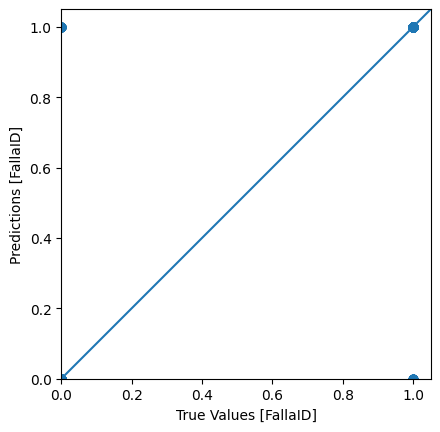

In [ ]:
plt.scatter(test_labels, binary_predictions)
plt.xlabel('True Values [FallaID]')
plt.ylabel('Predictions [FallaID]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
type(binary_predictions)

numpy.ndarray

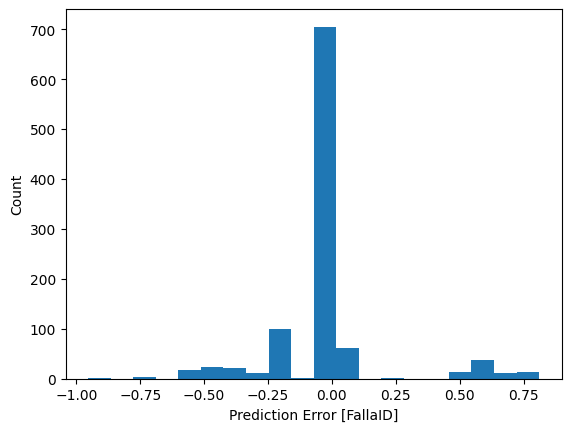

In [ ]:
# VER DISTRIBUCIÓN DE ERRORES DE PREDICCIÓN
# usamos las predicciones tal como salen del modelo -Probabilidades
error = test_predictions - test_labels #1-1=0 y 0-0=0 prediccion correcta el resto con niveles de incertidumbre)
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error [FallaID]")
_ = plt.ylabel("Count")

In [ ]:
# @title
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report


# Extraer los valores de la matriz de confusión
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
true_neg

# Calcular las métricas
accuracy = (true_neg + true_pos) / sum(sum(row) for row in cm)
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
f1 = 2 * (precision * recall) / (precision + recall)
kappa = cohen_kappa_score([1]*438 + [1]*72 + [2]*6 + [2]*507,
                          [1]*438 + [2]*72 + [1]*6 + [2]*507)


# Mostrar resultados
print(f"Accuracy: {accuracy:.2f}") #Mide cuántas predicciones fueron correctas sobre el total de ejemplos
print(f"Precision: {precision:.2f}") #Indica cuántos de los positivos que el modelo predijo realmente son positivos.
print(f"Recall: {recall:.2f}") #Mide cuántos de los positivos reales fueron detectados correctamente.
print(f"F1-score: {f1:.2f}") #Es el promedio armonico entre Precision y Recall
print(f"Kappa: {kappa:.2f}") #mide grado de concordancia entre las predicciones del modelo y la realidad, considerando el azar.Datasets desbalanceados

# Calcular reporte detallado
y_true = [1]*438 + [1]*72 + [2]*6 + [2]*507
y_pred = [1]*438 + [2]*72 + [1]*6 + [2]*507
report = classification_report(y_true, y_pred, target_names=["Clase 1", "Clase 2"])
print("\nReporte de Clasificación:")
print(report)

Accuracy: 0.92
Precision: 0.88
Recall: 0.96
F1-score: 0.92
Kappa: 0.85

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 1       0.99      0.86      0.92       510
     Clase 2       0.88      0.99      0.93       513

    accuracy                           0.92      1023
   macro avg       0.93      0.92      0.92      1023
weighted avg       0.93      0.92      0.92      1023



Verdadero Positivo = TP = Predigo falla y es falla

Falso Positivo = FP = Predigo falla y no es falla


Verdadero Negativo = TN = Predigo no falla y no es falla

Falso Negativo = FN = Predigo no falla y es falla

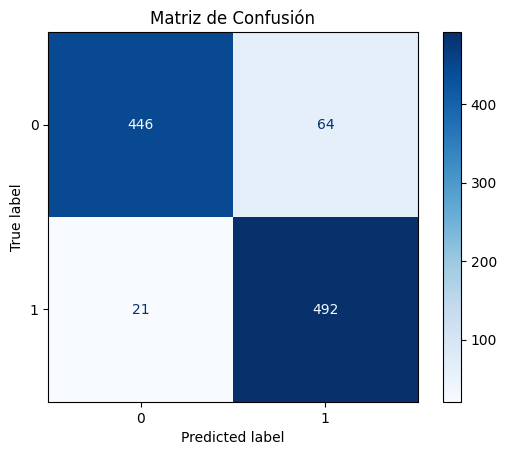

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, binary_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

**Para analizar el costo-beneficio basado en la matriz de confusión, primero identificamos los casos:**

•	Verdaderos Positivos (VP = 492): La bomba es propensa a refacción y el modelo la clasifica correctamente.

•	Falsos Positivos (FP = 64): La bomba es óptima, pero el modelo la clasifica como propensa a refacción.

•	Falsos Negativos (FN = 21): La bomba es propensa a refacción, pero el modelo la clasifica como óptima.

•	Verdaderos Negativos (VN = 446): La bomba es óptima y el modelo la clasifica correctamente.

 **Costos y Beneficios Asociados**
1.	Falsos Negativos (FN = 21) → Costo alto
-Estas bombas necesitan refacción, pero el modelo las considera saludables.
-Costo asociado: Daños en la producción, pérdidas económicas, costos de reparación urgentes.
-Costo informado por la empresa : $50,000 por cada bomba mal clasificada.

Costo total FN = 21 × 50,000 = $---

2.	Falsos Positivos (FP = 64) → Costo medio
-Bombas en buen estado enviadas innecesariamente a mantenimiento.
-Costo asociado: Gastos innecesarios en mantenimiento y piezas.
-Costo informado por la empresa: $10,000 por cada bomba mal clasificada.

Costo total FP = 64 × 10,000 = $---

3.	Verdaderos Positivos (VP = 492) → Beneficio alto

  -El modelo detecta correctamente las bombas que requieren refacción, evitando fallos inesperados.
  -Beneficio asociado: Prevención de pérdidas y reducción de costos operativos.
  -Beneficio informado por la empresa: $30,000 por cada bomba correctamente clasificada.

  Beneficio total VP = 492× 30,000 = $---

4.	Verdaderos Negativos (VN = 438) → Beneficio medio
-El modelo evita reparaciones innecesarias y reduce gastos de mantenimiento.
-Beneficio asociado: Reducción de costos por revisiones innecesarias.
-Beneficio informado por la empresa: $5,000 por cada bomba correctamente clasificada.

-Beneficio total VN = 446 × 5,000 = ---

In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[446, 64],  # Fila 1: [VN, FP]
               [21, 492]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $1,690,000
Beneficio total: $16,990,000
Ganancia neta: $15,300,000


# **Ganancia neta *5 (para todo el dataset) = 76500000
**

# **AJUSTAMOS HIPERPARÁMETROS**

SE AGREGA UNA CAPA DENSA DE 16 NEURONAS

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(65, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Activación sigmoide para salida binaria
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # Pérdida para clasificación binaria
        metrics=['accuracy']  # Métricas de evaluación
    )
    return model

In [ ]:
# INSTANCIAR MODELO
model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# COMPROBAR MODELO
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 65)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,143 (35.72 KB)

 Trainable params: 3,047 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,096 (23.82 KB)

In [ ]:
#ENTRENAMIENTO: se modifica la paciencia a valor 30 ya que con el valor anterior de paciencia, la red con la nueva
#capa de neuronas obtuvo similares resultados.

#CLASE PARA MOSTRAR PUNTOS EN ENTRENAMIENTO
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
# El parámetro de paciencia es la cantidad de épocas que se deben verificar para detectar mejoras.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)


history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[early_stop, PrintDot()])

Epoch 1/500
 86/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - loss: 0.6352
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6796 - loss: 0.6269 - val_accuracy: 0.7827 - val_loss: 0.5288
Epoch 2/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8125 - loss: 0.4899 - val_accuracy: 0.9219 - val_loss: 0.3656
Epoch 3/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9157 - loss: 0.3197 - val_accuracy: 0.9231 - val_loss: 0.2155
Epoch 4/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9174 - loss: 0.2112 - val_accuracy: 0.9121 - val_loss: 0.2136
Epoch 5/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9093 - loss: 0.1967 - val_accuracy: 0.9182 - val_loss: 0.1706
Epoch 6/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9158 - loss: 0.1856 - val_accuracy: 0.9182 - val_loss: 0.1599
Epoch 7/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9090 - loss: 0.1732 - val_accuracy: 0.9194 - val_loss: 0.1556
Epoch 8/500
103/103 ━━

In [ ]:
#Predicción

test_predictions = model.predict(normed_test_data).flatten()

# Convertir probabilidades a clases binarias mayor 0.5 será 1 de lo contrario 0
binary_predictions = (test_predictions > 0.5).astype(int) #necesario porque no puede comparar etiquetas entera con predicc float


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


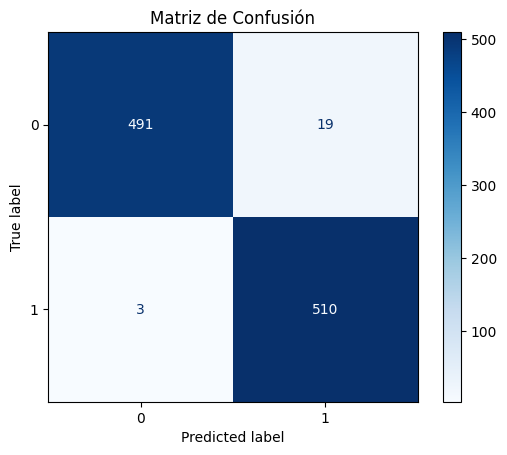

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, binary_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[491, 19],  # Fila 1: [VN, FP]
               [3, 510]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $340,000
Beneficio total: $17,755,000
Ganancia neta: $17,415,000


# **Ganancia neta *5 (para todo el dataset) = 87075000 (muy cerca del techo)**
piso: 51140000

techo:89495000

# **SEGUNDO MODELO: CLASIFICADOR DE SKLEARN**

In [ ]:
#USAMOS EL CLASIFICADOR DE SKLEARN: class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu'


from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    solver='adam',
    alpha=1e-3,
    hidden_layer_sizes=(64, 64),
    random_state=1,
    verbose=1,
    early_stopping=True,
    max_iter=1000,
    validation_fraction=0.2
)


In [ ]:
clf.fit(normed_train_data, train_labels)

Iteration 1, loss = 0.64315002
Validation score: 0.714286
Iteration 2, loss = 0.58973578
Validation score: 0.714286
Iteration 3, loss = 0.57168066
Validation score: 0.724054
Iteration 4, loss = 0.55797676
Validation score: 0.726496
Iteration 5, loss = 0.54315045
Validation score: 0.727717
Iteration 6, loss = 0.52739268
Validation score: 0.727717
Iteration 7, loss = 0.50910513
Validation score: 0.730159
Iteration 8, loss = 0.48835339
Validation score: 0.732601
Iteration 9, loss = 0.46277694
Validation score: 0.803419
Iteration 10, loss = 0.43648686
Validation score: 0.849817
Iteration 11, loss = 0.41100364
Validation score: 0.851038
Iteration 12, loss = 0.38382133
Validation score: 0.902320
Iteration 13, loss = 0.35803011
Validation score: 0.913309
Iteration 14, loss = 0.33173552
Validation score: 0.897436
Iteration 15, loss = 0.30702164
Validation score: 0.907204
Iteration 16, loss = 0.28711007
Validation score: 0.907204
Iteration 17, loss = 0.26712605
Validation score: 0.908425
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64),
              max_iter=1000, random_state=1, validation_fraction=0.2,
              verbose=1)

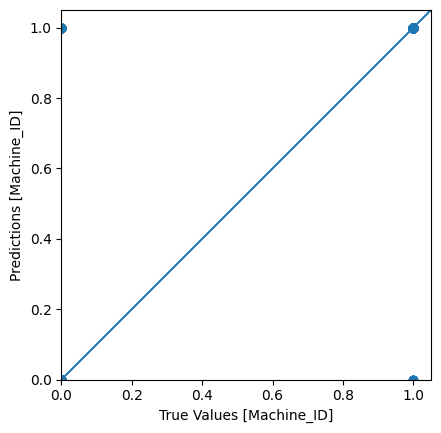

In [ ]:
# Como antes para comparar con los valores reales

test_predictions2=clf.predict(normed_test_data)

plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Values [Machine_ID]')
plt.ylabel('Predictions [Machine_ID]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

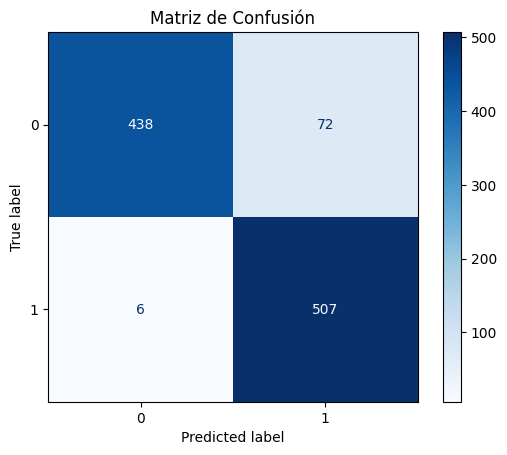

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, test_predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report


# Extraer los valores de la matriz de confusión
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
true_neg

# Calcular las métricas
accuracy = (true_neg + true_pos) / sum(sum(row) for row in cm)
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
f1 = 2 * (precision * recall) / (precision + recall)
kappa = cohen_kappa_score([1]*438 + [1]*72 + [2]*6 + [2]*507,
                          [1]*438 + [2]*72 + [1]*6 + [2]*507)

# Mostrar resultados
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Kappa: {kappa:.2f}")

# Calcular reporte detallado
y_true = [1]*438 + [1]*72 + [2]*6 + [2]*507
y_pred = [1]*438 + [2]*72 + [1]*6 + [2]*507
report = classification_report(y_true, y_pred, target_names=["Clase 1", "Clase 2"])
print("\nReporte de Clasificación:")
print(report)






Accuracy: 0.92
Precision: 0.88
Recall: 0.99
F1-score: 0.93
Kappa: 0.85

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 1       0.99      0.86      0.92       510
     Clase 2       0.88      0.99      0.93       513

    accuracy                           0.92      1023
   macro avg       0.93      0.92      0.92      1023
weighted avg       0.93      0.92      0.92      1023



In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[438, 72],  # Fila 1: [VN, FP]
               [6, 507]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $1,020,000
Beneficio total: $17,400,000
Ganancia neta: $16,380,000


# **Ganancia neta *5 (para todo el dataset) = 81900000 (muy cerca del techo)**

piso: 51140000

techo:89495000

In [ ]:
# @title
# Importa el modelo
from sklearn.naive_bayes import GaussianNB
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# @title
# Crea clasificador gaussiano
classifier = GaussianNB()
# train the model using the training sets
classifier.fit(normed_train_data, train_labels)
# predice la respuesta para el set de datos de testeo
y_pred = classifier.predict(normed_test_data)

In [ ]:
# @title
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# @title
import numpy as np
if np.isin(1, y_pred):
    print("El array contiene el elemento")
else:
    print("El array no contiene el elemento")

El array contiene el elemento


In [ ]:
# @title
# imprime accuracy
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.5845552297165201


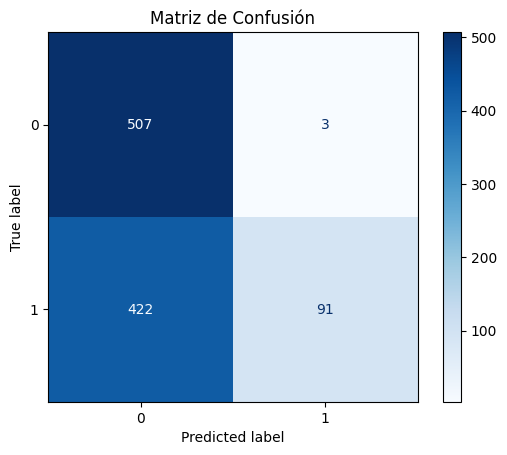

In [ ]:
# @title
!
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
# @title


In [ ]:
# @title
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[507, 3],  # Fila 1: [VN, FP]
               [422, 91]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $21,130,000
Beneficio total: $5,265,000
Ganancia neta: $-15,865,000


In [ ]:
# @title
data

,FallaID,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
0,0,0.349609,0.000343,0.012512,0.042480,24.25
1,0,0.349609,0.000343,0.012512,0.042480,24.25
2,0,0.349609,0.000343,0.012512,0.042480,24.25
3,0,0.349609,0.000343,0.012512,0.042480,24.25
4,0,0.349609,0.000343,0.012512,0.042480,24.25
...,...,...,...,...,...,...
5109,1,0.023193,0.000277,0.000637,0.006409,23.00
5110,1,0.023193,0.000277,0.000637,0.006409,23.00
5111,1,0.023193,0.000277,0.000637,0.006409,23.00
5112,1,0.023193,0.000277,0.000637,0.006409,23.00


# **KNN** ALGORITMO K VECINOS

In [ ]:
# 🔹 Normalizar los datos
scaler = StandardScaler()
normed_train_data = scaler.fit_transform(train_dataset)
normed_test_data = scaler.transform(test_dataset)

In [ ]:
train_dataset

,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
42,0.355469,0.000338,0.012695,0.043213,25.0
1505,0.285156,0.000233,0.010193,0.034424,26.0
311,0.361328,0.000319,0.012878,0.044189,25.0
2863,0.034668,0.000751,0.001656,0.020020,18.0
567,0.363281,0.000324,0.012939,0.044189,26.0
...,...,...,...,...,...
1876,0.287109,0.000236,0.010315,0.035156,27.0
2654,0.275391,0.000229,0.009888,0.033447,25.0
3296,0.029175,0.000580,0.001564,0.020752,24.0
814,0.500000,0.012695,0.058105,0.515625,26.0


In [ ]:
normed_train_data

array([[ 0.16824222, -0.32266781, -0.2876084 , -0.32104615,  0.21558906],
       [-0.03167949, -0.32418982, -0.30692208, -0.3290422 ,  0.72926106],
       [ 0.18490235, -0.32294455, -0.2861952 , -0.3201577 ,  0.21558906],
       ...,
       [-0.75951917, -0.31915336, -0.37351892, -0.3414805 , -0.29808295],
       [ 0.57919232, -0.14337491,  0.06286411,  0.10874135,  0.72926106],
       [ 1.90089624,  2.61949029,  2.81011619,  2.76698222,  0.21558906]])

# ****n_neighbors = 5****





In [ ]:
n_neighbors = 5   #4, 6, 7, 8, 9

knn = KNeighborsClassifier(n_neighbors, p=2, metric='minkowski', weights='distance')
knn.fit(normed_train_data, train_labels)
print('Accuracy of K-NN classifier on training set: {:.2f}')
   #  .format(normed_train_data, train_labels))
print('Accuracy of K-NN classifier on test set: {:.2f}')
   #  .format(knn.score(normed_test_data, test_labels)))

Accuracy of K-NN classifier on training set: {:.2f}
Accuracy of K-NN classifier on test set: {:.2f}


In [ ]:
knn.score(normed_train_data, train_labels)

1.0

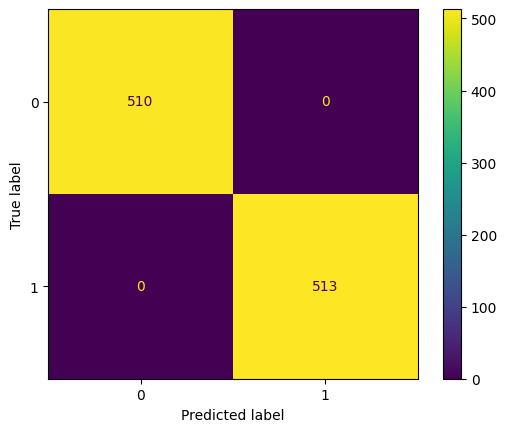

In [ ]:
#plt.rcdefaults()
pred = knn.predict(normed_test_data)
cm=confusion_matrix(test_labels, pred)
ConfusionMatrixDisplay(cm, display_labels=knn.classes_).plot()


In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[510, 0],  # Fila 1: [VN, FP]
               [0, 513]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $0
Beneficio total: $17,940,000
Ganancia neta: $17,940,000


# **Ganancia neta *5 (para todo el dataset) = 89700000 (el dataset de test tiene un pequeño desbalanceo hacia 1s)**

piso: 51140000

techo:89495000

# ****n_neighbors = 2 (se probó con >.3 y dio igual)****

In [ ]:
n_neighbors = 2  #4, 6, 7, 8, 9

knn = KNeighborsClassifier(n_neighbors, p=2, metric='minkowski', weights='distance')
knn.fit(normed_train_data, train_labels)
print('Accuracy of K-NN classifier on training set: {:.2f}')
   #  .format(normed_train_data, train_labels))
print('Accuracy of K-NN classifier on test set: {:.2f}')
   #  .format(knn.score(normed_test_data, test_labels)))

Accuracy of K-NN classifier on training set: {:.2f}
Accuracy of K-NN classifier on test set: {:.2f}


In [ ]:
knn.score(normed_train_data, train_labels)

1.0

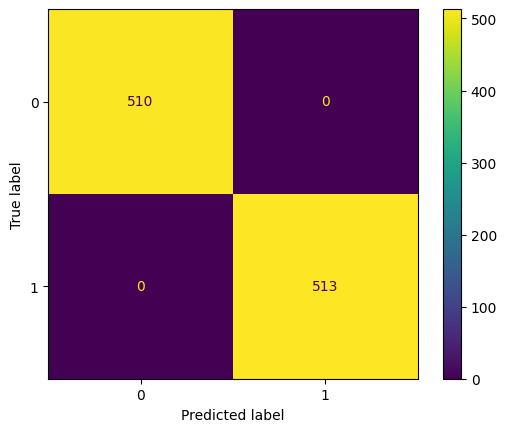

In [ ]:
#plt.rcdefaults()
pred = knn.predict(normed_test_data)
cm=confusion_matrix(test_labels, pred)
ConfusionMatrixDisplay(cm, display_labels=knn.classes_).plot()


In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[510, 0],  # Fila 1: [VN, FP]
               [0, 513]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $0
Beneficio total: $17,940,000
Ganancia neta: $17,940,000


# **COMPUTACION CUÁNTICA - REDES CUÁNTICAS**


🌌 La computación cuántica es un nuevo paradigma que utiliza los principios de la mecánica cuántica para resolver problemas complejos que resultan inabordables para la computación clásica. A diferencia de la física clásica, la teoría cuántica es probabilística, no determinista. Este carácter probabilístico la hace compatible con modelos de inteligencia artificial (IA), que también trabajan con incertidumbre, aprendizaje estadístico y toma de decisiones basadas en probabilidades.
________________________________________
⚛️ Elemento clave: El cúbit

En computación cuántica la unidad básica de información es el cúbit (qubit),

•	Un bit clásico puede estar en un solo estado a la vez: 0 o 1.

•	Un cúbit puede estar en 0, en 1, o en una combinación de ambos al mismo tiempo gracias a la superposición.


🌀 Esfera de Bloch

Todo estado de un cúbit puede representarse como un punto en una esfera tridimensional llamada esfera de Bloch. Esta representación ayuda a visualizar las rotaciones y transformaciones que sufre el qubit durante los cálculos.

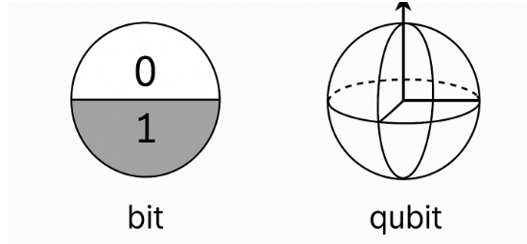

🧠 Principios fundamentales

🔹 Superposición
Permite que un cúbit esté en varios estados a la vez. Por ejemplo:
CopiarEditar
|ψ⟩ = α|0⟩ + β|1⟩
donde α y β son números complejos cuyas magnitudes representan las probabilidades de medir |0⟩ o |1⟩.

🔹 Entrelazamiento (Entanglement)
Dos cúbits pueden correlacionarse de tal manera que el estado de uno depende del otro, incluso si están lejos. Esto es clave para realizar operaciones en paralelo de forma eficiente (paralelismo cuántico).

🔹 Interferencia cuántica
Permite reforzar o cancelar ciertos resultados mediante la manipulación de fases cuánticas, lo que mejora la eficiencia de los algoritmos.
________________________________________
🛠️ Cómo se manipulan los cúbits
1. Puertas cuánticas
Operaciones que transforman el estado de los cúbits, similares a las puertas lógicas en la computación clásica.
Algunos ejemplos:

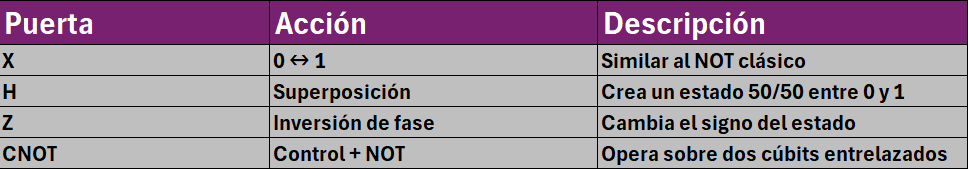

2. Rotaciones (Rx, Ry, Rz)
Permiten ajustar el estado del cúbit en la esfera de Bloch.

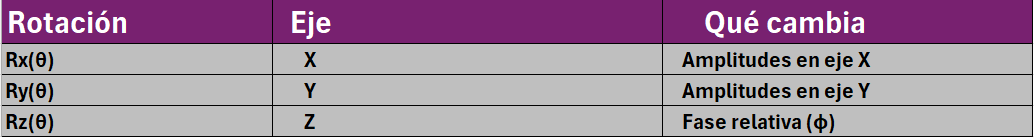

3. Medición

Cuando se mide un cúbit, su estado colapsa a 0 o 1 con ciertas probabilidades:

•	Se obtiene |0⟩ con probabilidad |α|²

•	Se obtiene |1⟩ con probabilidad |β|²

Después de la medición, el estado cuántico ya no está en superposición.
________________________________________
🧪 Funcionamiento general (ciclo de un algoritmo cuántico)
1.	Inicializar cúbits en |0⟩
2.	Aplicar puertas cuánticas y rotaciones
3.	Manipular fases con interferencia cuántica
4.	Medir el estado final para obtener resultados clásicos
________________________________________
📈 ¿Cuándo es útil la computación cuántica?

•	Cuando se trabaja con bases de datos no ordenadas (búsqueda cuántica: de O(N) a O(√N))

•	En problemas de optimización complejos

•	En simulaciones moleculares, ciberseguridad, inteligencia artificial

•	Cuando no se pueden usar estructuras de datos eficientes

________________________________________
🔒 Desafíos actuales

•	Decoherencia cuántica: pérdida de la superposición por interacción con el entorno

•	Escalabilidad: mantener muchos cúbits estables es difícil

•	Falta de lenguajes estándar: se utilizan frameworks como Qiskit (IBM) o PennyLane (Xanadu)

________________________________________
🧠 Conexión con la Inteligencia Artificial
La IA y la computación cuántica tienen afinidades clave:

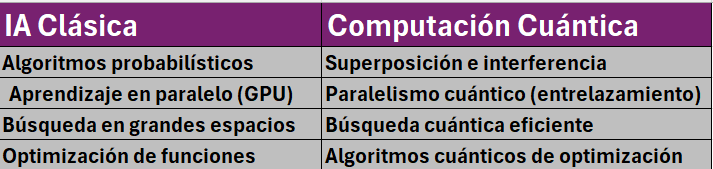



Las redes neuronales cuánticas y el machine learning cuántico ya son campos emergentes que combinan lo mejor de ambos mundos.
________________________________________
🧩 Conclusión
La computación cuántica representa una revolución tecnológica con un potencial inmenso, especialmente en problemas donde la IA actual encuentra límites computacionales. Gracias a sus principios únicos como la superposición, el entrelazamiento y la interferencia, ofrece un enfoque completamente nuevo y probabilístico, alineado con el enfoque estadístico que domina en la inteligencia artificial moderna.


#  **MODELO DE RED NEURAL CUÁNTICA**

🚀 Este modelo es una red neuronal cuántica (QNN) con n_qubits como número de neuronas/cuánticas. Se entrena con backpropagation y optimización clásica, pero la representación de datos se realiza en un circuito cuántico. Esto permite aprovechar propiedades cuánticas como la superposición y el entrelazamiento para mejorar el aprendizaje en ciertos problemas.
Este código integra computación cuántica (PennyLane) con machine learning clásico (PyTorch) para construir un modelo híbrido capaz de aprender patrones en los datos sensoriales y predecir fallas. La parte cuántica (RY + CNOT + PauliZ) introduce propiedades no clásicas como el entrelazamiento, que podrían mejorar el poder predictivo para ciertos datasets.

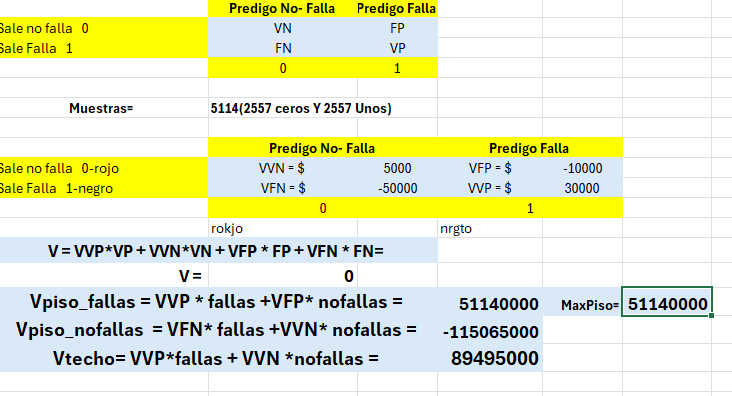

In [ ]:
# 📌 INSTALAR PENNYLANE Y TORCH SI NO ESTÁN INSTALADOS
# PennyLane es una biblioteca de Python de código abierto que permite crear, simular, y optimizar circuitos cuánticos.
# Se utiliza para el aprendizaje automático cuántico (QML), la química cuántica, y la computación cuántica.
#!pip install pennylane torch pandas scikit-learn

import pennylane as qml
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


In [ ]:
data

,FallaID,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
0,0,0.349609,0.000343,0.012512,0.042480,24.25
1,0,0.349609,0.000343,0.012512,0.042480,24.25
2,0,0.349609,0.000343,0.012512,0.042480,24.25
3,0,0.349609,0.000343,0.012512,0.042480,24.25
4,0,0.349609,0.000343,0.012512,0.042480,24.25
...,...,...,...,...,...,...
5109,1,0.023193,0.000277,0.000637,0.006409,23.00
5110,1,0.023193,0.000277,0.000637,0.006409,23.00
5111,1,0.023193,0.000277,0.000637,0.006409,23.00
5112,1,0.023193,0.000277,0.000637,0.006409,23.00


In [ ]:
# DEFINIR CONJUNTO DE ENTRENAMIENTO 80% Y CONJUNTO DE TEST 20%  PARA TOMAR LA MUESTRA ALEATORIA
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
X_train = data.sample(frac=0.8,random_state=0)
X_test = data.drop(X_train.index) #Esto elimina del DataFrame original data las mismas filas seleccionadas
                                  #para X_train.Por lo tanto, lo que queda (el 20% restante) se asigna a X_test

# CORTAR LA CARACTERÍSTICA machine_ID DEL DATASET DE ENTRENAMIENTO Y TEST Y GUARDAR EN VARIABLE NUEVA
y_train = X_train.pop('FallaID')
y_test = X_test.pop('FallaID')



# 🔹 Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 🔹 Conversión a tensores y uso de GPU
#Se detecta si hay GPU disponible. Luego se convierten los datos normalizados y las etiquetas a tensores
#de PyTorch y se cargan al dispositivo correspondiente (cpu o cuda).
import numpy as np

# Enviar a GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convertir X_train y X_test a NumPy si aún no lo son
X_train_np = np.array(X_train) if not isinstance(X_train, np.ndarray) else X_train
X_test_np = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test

# Convertir y_train y y_test a NumPy
y_train_np = np.array(y_train) if not isinstance(y_train, np.ndarray) else y_train
y_test_np = np.array(y_test) if not isinstance(y_test, np.ndarray) else y_test

# Convertir a tensores de PyTorch y enviarlos a dispositivo
X_train_torch = torch.from_numpy(X_train_np).float().to(device)
y_train_torch = torch.from_numpy(y_train_np).float().unsqueeze(1).to(device)  # Agregar dimensión extra

X_test_torch = torch.from_numpy(X_test_np).float().to(device)
y_test_torch = torch.from_numpy(y_test_np).float().unsqueeze(1).to(device)  # Agregar dimensión extra

print(f"X_train_torch shape: {X_train_torch.shape}")  # Debe ser (N, num_características)
print(f"y_train_torch shape: {y_train_torch.shape}")  # Debe ser (N, 1)
print(f"X_test_torch shape: {X_test_torch.shape}")    # Debe ser (M, características)
print(f"y_test_torch shape: {y_test_torch.shape}")    # Debe ser (M, 1)

print(f"¿X_train_torch está en {X_train_torch.device}?")
print(f"¿y_train_torch está en {y_train_torch.device}?")



X_train_torch shape: torch.Size([4091, 5])
y_train_torch shape: torch.Size([4091, 1])
X_test_torch shape: torch.Size([1023, 5])
y_test_torch shape: torch.Size([1023, 1])
¿X_train_torch está en cpu?
¿y_train_torch está en cpu?


In [ ]:
# @title
# 🔹 2️⃣ DEFINIR CIRCUITO CUÁNTICO EN PENNYLANE
#        Se crea un dispositivo cuántico simulado con tantos qubits como características tenga el dataset.

n_qubits = X_train.shape[1]  # Usamos tantos qubits como características

dev = qml.device("default.qubit", wires=n_qubits) #crea simulador cuántico que correrá los circuitos.
#qml.device(...): es la función que crea un "dispositivo cuántico" virtual
#"default.qubit": indica el tipo de simulador que se usará. En este caso:
#Es un simulador clásico que modela qubits como vectores de estado.
#No necesitas una computadora cuántica real; funciona en tu CPU.
#wires=n_qubits: define cuántos qubits (hilos/cuadrículas) tendrá tu circuito.

# 🔹 El circuito cuántico:

#  Codifica los datos como rotaciones (RY) en cada qubit.

#  Entrelaza los qubits para generar correlaciones.

#  Aplica puertas cuánticas con pesos entrenables.

#  Devuelve la expectativa de PauliZ sobre el primer qubit (una salida continua entre -1 y 1).


@qml.qnode(dev, interface="torch", diff_method="parameter-shift") #parameter-shift, que permite calcular gradientes en circuitos cuánticos.
#Este decorador transforma la función que define un circuito cuántico en un objeto ejecutable.
#Es necesario para que PennyLane pueda correr el circuito en un dispositivo (dev)
#y conectarlo a un framework como PyTorch o TensorFlow.

#@qml.qnode(dev, interface="torch")
def circuit_with_interference(inputs, weights):
    # Codificación de datos
    for i in range(n_qubits):
        qml.Hadamard(wires=i)  # Superposición
        qml.RZ(inputs[i], wires=i)  # Modificación de fase basada en input
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])  # Aplica CNOT entre quYbits consecutivos
        #qml.H(wires=i)
    # Interferencia: rotaciones + entrelazamiento
    for i in range(n_qubits - 1):
        #qml.CZ(wires=[i, i+1])  # Interacción entre qubits
        # qml.RZ(weights[i], wires=i)  # Cambiar fase con parámetro entrenable
        theta, phi, lam = weights[i]
        qml.U3(theta.item(), phi.item(), lam.item(), wires=i)
    return qml.expval(qml.PauliZ(0))


def quantum_circuit_torch(inputs, weights):
    """Ejecuta el circuito cuántico y devuelve un tensor de PyTorch"""

    return circuit_with_interference(inputs, weights)  # Ya devuelve tensor con gradientes


# 🔹 3️⃣ DEFINIR LA RED NEURONAL CUÁNTICA (QNN)
#  nn clase pytorch que permite construir modelos de redes neuronales
# Hereda de nn.Module (nn clase pytorch que permite construir modelos de redes neuronales)

# Tiene un solo conjunto de pesos cuánticos (1 por qubit).

# En el forward, ejecuta el circuito cuántico sobre cada ejemplo del lote.

# La salida es pasada por una sigmoide, ya que es un problema de clasificación binaria.
class QuantumNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_qubits, 3, requires_grad=True))  # 🔹 Permitir gradientes AGTREGUE 3

    def forward(self, x):
        batch_size = x.shape[0]
        q_out = torch.zeros(batch_size, device=x.device)  # Crear un tensor vacío Y Mover a GPU si está disponible


        for i in range(batch_size):
            q_out[i] = quantum_circuit_torch(x[i], self.weights)  # 🔹 Pasar weights al circuito

        return torch.sigmoid(q_out).unsqueeze(1) #realiza dos operaciones sobre un tensor q_out en PyTorch
        #Aplica la función sigmoide elemento a elemento sobre q_out
        #Agrega con unsqueeze(1) una nueva dimensión en la posición 1:(batch_size, 1),útil para modelos que
        #esperan una forma específica, como al usar BCELoss






In [ ]:
# 🔹 2️⃣ DEFINIR CIRCUITO CUÁNTICO EN PENNYLANE
#        Se crea un dispositivo cuántico simulado con tantos qubits como características tenga el dataset.

n_qubits = X_train.shape[1]  # Usamos tantos qubits como características

dev = qml.device("default.qubit", wires=n_qubits) #crea simulador cuántico que correrá los circuitos.
#qml.device(...): es la función que crea un "dispositivo cuántico" virtual
#"default.qubit": indica el tipo de simulador que se usará. En este caso:
#Es un simulador clásico que modela qubits como vectores de estado.
#No necesitas una computadora cuántica real; funciona en tu CPU.
#wires=n_qubits: define cuántos qubits (hilos/cuadrículas) tendrá tu circuito.

# 🔹 El circuito cuántico:

#  Codifica los datos como rotaciones (RY) en cada qubit.

#  Entrelaza los qubits para generar correlaciones.

#  Aplica puertas cuánticas con pesos entrenables.

#  Devuelve la expectativa de PauliZ sobre el primer qubit (una salida continua entre -1 y 1).


@qml.qnode(dev, interface="torch", diff_method="parameter-shift") #parameter-shift, que permite calcular gradientes en circuitos cuánticos.
#Este decorador transforma la función que define un circuito cuántico en un objeto ejecutable.
#Es necesario para que PennyLane pueda correr el circuito en un dispositivo (dev)
#y conectarlo a un framework como PyTorch o TensorFlow.

def quantum_circuit(inputs, weights):
    """Circuito cuántico que codifica los datos en qubits y realiza transformaciones"""
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)  # Codifica datos en rotaciones

     # 🔹 Agregar entrelazamiento entre qubits para mejorar el aprendizaje
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])  # Aplica CNOT entre quYbits consecutivos
        #qml.H(wires=i)
    # 🔹 Aplicar puertas de entrenamiento a pesos
    for i in range(n_qubits):
        #qml.RY(weights[i], wires=i)
        theta, phi, lam = weights[i]
        qml.U3(theta.item(), phi.item(), lam.item(), wires=i)


    # se colapsa/mide todos los qubits
    return qml.expval(qml.PauliZ(0))

def quantum_circuit_torch(inputs, weights):
    """Ejecuta el circuito cuántico y devuelve un tensor de PyTorch"""

    return quantum_circuit(inputs, weights)  # Ya devuelve tensor con gradientes


# 🔹 3️⃣ DEFINIR LA RED NEURONAL CUÁNTICA (QNN)
#  nn clase pytorch que permite construir modelos de redes neuronales
# Hereda de nn.Module (nn clase pytorch que permite construir modelos de redes neuronales)

# Tiene un solo conjunto de pesos cuánticos (1 por qubit).

# En el forward, ejecuta el circuito cuántico sobre cada ejemplo del lote.

# La salida es pasada por una sigmoide, ya que es un problema de clasificación binaria.
class QuantumNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_qubits,3, requires_grad=True))  # 🔹 Permitir gradientes AGTREGUE 3

    def forward(self, x):
        batch_size = x.shape[0]
        q_out = torch.zeros(batch_size, device=x.device)  # Crear un tensor vacío Y Mover a GPU si está disponible


        for i in range(batch_size):
            q_out[i] = quantum_circuit_torch(x[i], self.weights)  # 🔹 Pasar weights al circuito

        return torch.sigmoid(q_out).unsqueeze(1) #realiza dos operaciones sobre un tensor q_out en PyTorch
        #Aplica la función sigmoide elemento a elemento sobre q_out
        #Agrega con unsqueeze(1) una nueva dimensión en la posición 1:(batch_size, 1),útil para modelos que
        #esperan una forma específica, como al usar BCELoss






In [ ]:
from torch.utils.data import DataLoader, TensorDataset
# DataLoader: cargador de datos combina un conjunto de datos y un muestreador, y proporciona un iterable
#             sobre el conjunto de datos dado
# 🔹 4️⃣ ENTRENAR LA QNN
# *Optimización con Adam.
# *Función de pérdida entropía cruzada binaria (BCELoss) adecuada para clasificación binaria.
# *Crea mini-lotes de tamaño 25 para entrenamiento por lotes (batch training).
# *Entrena el modelo durante varias épocas, actualizando los pesos cuánticos usando backpropagation.
# *Se evalúa el modelo y se calcula la precisión final (accuracy).

model = QuantumNeuralNet()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)#utiliza como optimizador Adam, variante de descenso del gradiente
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)



loss_fn = nn.BCELoss()  # (Binary Cross Entropy para clasificación.No optimiza solo devuelve el valor del error)
# Asegurar que el modelo está en modo de entrenamiento
model.train()
# Asegurar que X_train_torch tenga gradientes
X_train_torch.requires_grad = True


# Crear dataset de PyTorch
train_dataset = TensorDataset(X_train_torch, y_train_torch)

# Dividir en lotes de 25 muestras
#batch_size = 25
train_loader = DataLoader(train_dataset, batch_size=25, shuffle=True)
#num_batches = len(train_loader)
# 🔹 ENTRENAR LA QNN con Mini-Batch Gradient Descent
# Definir la cantidad de épocas

epochs = 1
print("Entrenando red cuántica")
for epoch in range(epochs):
  print(f"Época {epoch+1}/{epochs}")
  total_loss = 0  # Para calcular el promedio de la pérdida en la época
  for i, (batch_X, batch_y) in enumerate(train_loader):  # 🔥 Se procesan lotes de 25 muestras
    optimizer.zero_grad()
    y_pred = model(batch_X)
    loss = loss_fn(y_pred, batch_y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    #y_pred = (y_pred.numpy() > 0.73).astype(int)
    #acc = accuracy_score(y_test_torch, y_pred)
    print(f"Lote de entrenamiento:🔹 {i+1} **loss: {loss.item():.4f}**")

  avg_loss = total_loss / len(train_loader)  # Pérdida promedio por mini-batch
  print(f"Época {epoch+1}/{epochs} - Pérdida promedio (avg_loss): {avg_loss:.4f}")

# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = ((y_pred_testx.cpu().numpy() > 0.60)).astype(int)

    #y_pred_test = (y_pred_testx.numpy() > 0.5).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")


Entrenando red cuántica
Época 1/1
Lote de entrenamiento:🔹 1 **loss: 1.0016**
Lote de entrenamiento:🔹 2 **loss: 0.8890**
Lote de entrenamiento:🔹 3 **loss: 0.8656**
Lote de entrenamiento:🔹 4 **loss: 0.8342**
Lote de entrenamiento:🔹 5 **loss: 0.8643**
Lote de entrenamiento:🔹 6 **loss: 0.8570**
Lote de entrenamiento:🔹 7 **loss: 0.8979**
Lote de entrenamiento:🔹 8 **loss: 0.6864**
Lote de entrenamiento:🔹 9 **loss: 0.8434**
Lote de entrenamiento:🔹 10 **loss: 0.9551**
Lote de entrenamiento:🔹 11 **loss: 0.8109**
Lote de entrenamiento:🔹 12 **loss: 0.8261**
Lote de entrenamiento:🔹 13 **loss: 0.7960**
Lote de entrenamiento:🔹 14 **loss: 0.7898**
Lote de entrenamiento:🔹 15 **loss: 0.6994**
Lote de entrenamiento:🔹 16 **loss: 0.7448**
Lote de entrenamiento:🔹 17 **loss: 0.8625**
Lote de entrenamiento:🔹 18 **loss: 0.9265**
Lote de entrenamiento:🔹 19 **loss: 0.9028**
Lote de entrenamiento:🔹 20 **loss: 0.9416**
Lote de entrenamiento:🔹 21 **loss: 0.8400**
Lote de entrenamiento:🔹 22 **loss: 0.7782**
Lote de

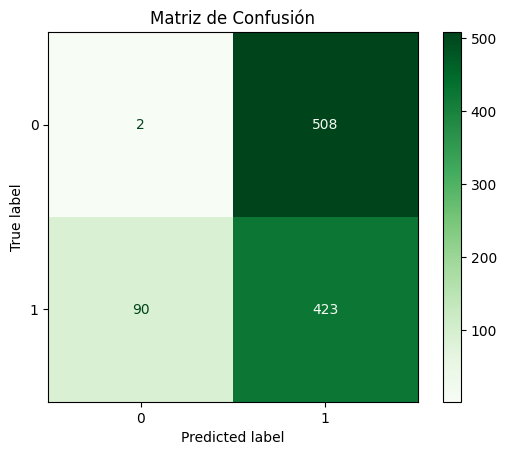

In [ ]:
# >0.60 y Precisión Final del modelo cuántico: 0.4154
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[1, 509],  # Fila 1: [VN, FP]
               [90, 423]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $9,590,000
Beneficio total: $12,695,000
Ganancia neta: $3,105,000


In [ ]:
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = (y_pred_testx.numpy() > 0.6).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.4154**


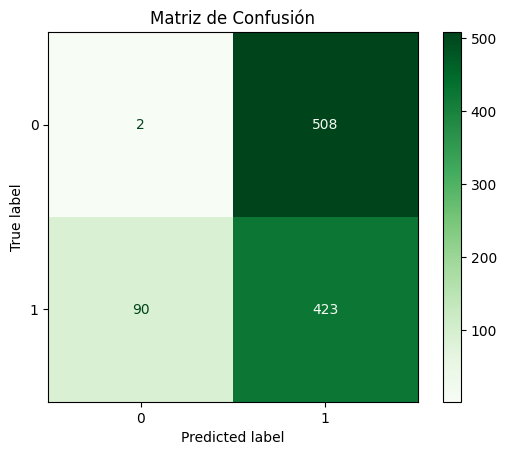

In [ ]:
# >0.6 y 0.41 precision
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[2, 508],  # Fila 1: [VN, FP]
               [90, 423]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $9,580,000
Beneficio total: $12,700,000
Ganancia neta: $3,120,000


In [ ]:
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = (y_pred_testx.numpy() > 0.70).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.4428**


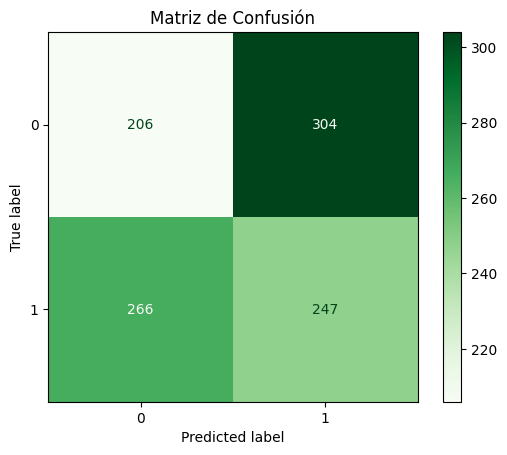

In [ ]:
#>0.70
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[206, 304],  # Fila 1: [VN, FP]
               [266, 247]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $16,340,000
Beneficio total: $8,440,000
Ganancia neta: $-7,900,000


**Para analizar el costo-beneficio basado en la matriz de confusión, primero identificamos los casos:

• Verdaderos Positivos (VP = 50): La bomba es propensa a refacción y el modelo la clasifica correctamente.

• Falsos Positivos (FP = 2): La bomba es óptima, pero el modelo la clasifica como propensa a refacción.

• Falsos Negativos (FN = 463): La bomba es propensa a refacción, pero el modelo la clasifica como óptima.

• Verdaderos Negativos (VN = 508): La bomba es óptima y el modelo la clasifica correctamente.

In [ ]:
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = (y_pred_testx.numpy() > 0.4).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.4702**


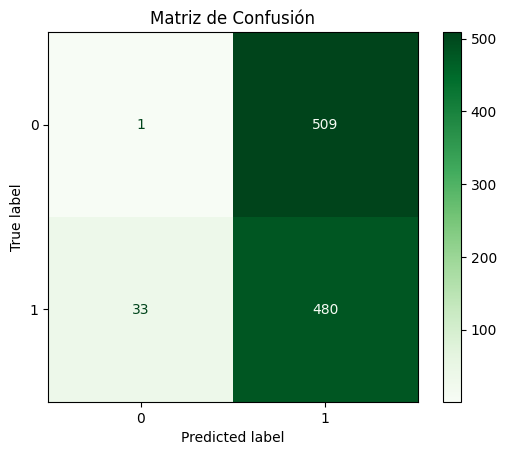

In [ ]:
#>0.50
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
#>0.40
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[1, 509],  # Fila 1: [VN, FP]
               [33, 480]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $6,740,000
Beneficio total: $14,405,000
Ganancia neta: $7,665,000


In [ ]:
#>0.3
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = (y_pred_testx.numpy() > 0.3).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.4995**


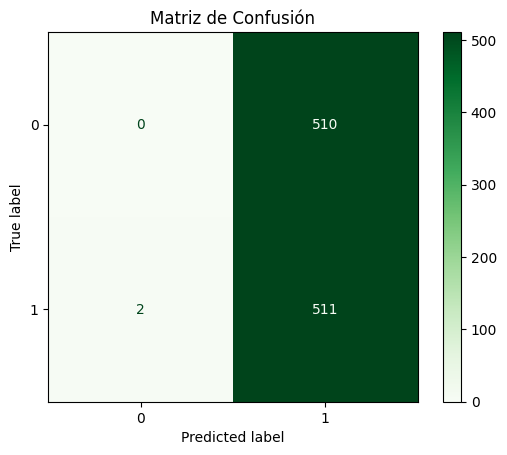

In [ ]:
#>0.30
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
#>0.30
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[0, 510],  # Fila 1: [VN, FP]
               [2, 511]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $5,200,000
Beneficio total: $15,330,000
Ganancia neta: $10,130,000


In [ ]:
#< 0.69) OR >= 0.73
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    #y_pred_test = (y_pred_testx.numpy() > 0.3).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu

    # sale solo 3 millonesy_pred_test = ((y_pred_testx.cpu().numpy() < 0.673) | (y_pred_testx.cpu().numpy() >= 0.73)).astype(int)
    y_pred_test = ((y_pred_testx.cpu().numpy() < 0.69) | (y_pred_testx.cpu().numpy() >= 0.73)).astype(int)
    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.7849**


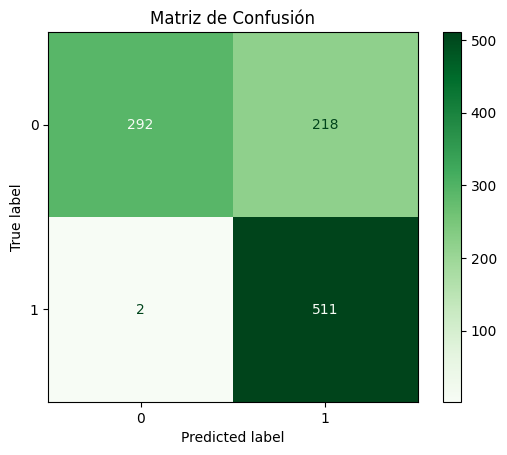

In [ ]:
# < 0.69 or >= 0.73 y 0.78 precision , pruebo el total
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[292, 218],  # Fila 1: [VN, FP]
               [2, 511]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")

Costo total: $2,280,000
Beneficio total: $16,790,000
Ganancia neta: $14,510,000


#     **14.510.000*5= 72.550.000**  (piso 51 millones y techo 89)

In [ ]:
# @title
loss

tensor(0.7360, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
# @title
# Desactiva el recorte automático
torch.set_printoptions(threshold=float('inf'))

# Ahora se mostrará completo
print(y_pred_test)
df = pd.DataFrame(y_pred_test)
df.to_csv("predicc_colap.csv", index=False)



[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# @title
#pasé a archivo para analizar distribución de las muestras de testeo para encontrar para encontrar le rango con mejor resultado
import pandas as pd

# Asegúrate de mover a CPU y convertir a NumPy si está en GPU
y_numpy = y_pred_testx.detach().cpu().numpy()

# Crear DataFrame y exportar
df = pd.DataFrame(y_numpy)
df.to_csv("predicciones.csv", index=False)


In [ ]:
# @title
(y_pred_testx > 0.7).sum()


tensor(790)

In [ ]:
# @title
(y_pred_testx <= 0.5).sum()


tensor(91)

In [ ]:
# @title
print(y_test_torch)


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [ ]:
y_numpy = y_test_torch.detach().cpu().numpy()

# Crear DataFrame y exportar
df = pd.DataFrame(y_numpy)
df.to_csv("real.csv", index=False)


In [ ]:
# @title

(y_test_torch < 0.5).sum()

tensor(510)

In [ ]:
# @title
(y_pred_test == 0).sum()

np.int64(971)

# **Transformaciones de datos para optimizar funcionamiento de red cuántica**

In [ ]:
dataset = data.copy()
Condicion = dataset.pop('FallaID')

In [ ]:
dataset

,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
0,0.349609,0.000343,0.012512,0.042480,24.25
1,0.349609,0.000343,0.012512,0.042480,24.25
2,0.349609,0.000343,0.012512,0.042480,24.25
3,0.349609,0.000343,0.012512,0.042480,24.25
4,0.349609,0.000343,0.012512,0.042480,24.25
...,...,...,...,...,...
5109,0.023193,0.000277,0.000637,0.006409,23.00
5110,0.023193,0.000277,0.000637,0.006409,23.00
5111,0.023193,0.000277,0.000637,0.006409,23.00
5112,0.023193,0.000277,0.000637,0.006409,23.00


In [ ]:
import numpy as np
#import pandas as pd

def aplicar_ruido_multiplicativo(df, alpha=0.2, variables_objetivo=None):
    """
    Añade ruido multiplicativo no lineal a variables específicas.

    Args:
        df (pd.DataFrame): Dataset original
        alpha (float): Intensidad del ruido
        variables_objetivo (list): Variables a modificar
    """
    df_noisy = df.copy()
    np.random.seed(42)

    for var in variables_objetivo:
        # Ruido no lineal: función exponencial del error
        noise = 1 + alpha * np.exp(np.random.normal(0, 1, len(df)))
        df_noisy[var] = df[var] * noise

    return df_noisy

# Ejemplo de uso
#df_original = pd.read_csv('datos_bombas.csv')
variables = ['velocidad_ISO','demodulación_rms','aceleración_rms','aceleración_PaP',
                'temperatura']
df_modificado = aplicar_ruido_multiplicativo(dataset, alpha=0.3, variables_objetivo=variables)

In [ ]:
df_modificado

,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura
0,0.521965,0.000433,0.014715,0.070145,28.657091
1,0.440949,0.000516,0.014167,0.100246,26.871387
2,0.550053,0.000892,0.022271,0.050561,26.588067
3,0.830612,0.000400,0.013646,0.069112,27.307855
4,0.432597,0.000364,0.014048,0.052487,33.158825
...,...,...,...,...,...
5109,0.030739,0.000404,0.000918,0.008910,60.170474
5110,0.027496,0.000573,0.000770,0.008210,28.742755
5111,0.111364,0.000486,0.000790,0.007400,32.973696
5112,0.029879,0.000319,0.001242,0.009630,30.644603


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


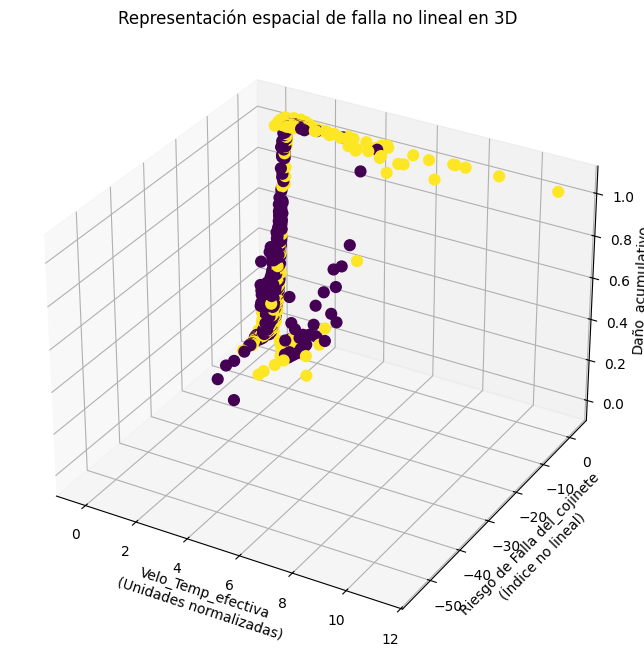

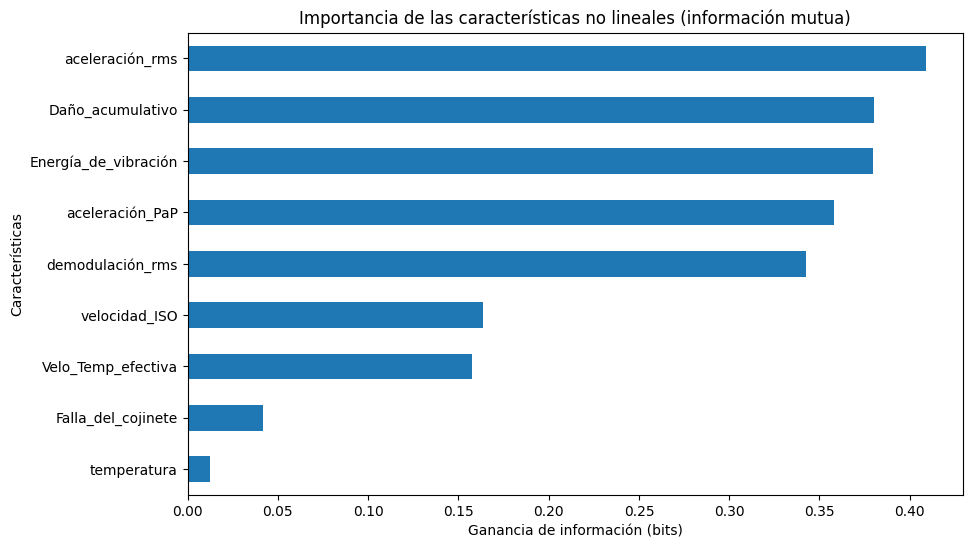

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import mutual_info_classif
# 1. Ingeniería de características no lineales
def create_nonlinear_features(df):
    """Crear relaciones no lineales físicamente significativas"""
    # Interacción Velocidad_Temperatura (Relación de tipo Arrhenius)
    df['Velo_Temp_efectiva'] = np.where(
        df['temperatura'] > 75,
        df['velocidad_ISO'] * np.log(df['temperatura'] - 50),
        df['velocidad_ISO'] * 0.8
    )

    # Indicador de Falla del cojinete (Non-linear combination)
    df['Falla_del_cojinete'] = (
        2.5 * np.sqrt(df['demodulación_rms']) +
        0.3 * (df['aceleración_PaP'] ** 1.7) -
        0.01 * df['temperatura']**2
    )

    # Métrica Energía_de_vibración (Composite non-linear feature)
    df['Energía_de_vibración'] = (
        0.7 * df['velocidad_ISO']**3 +
        1.2 * np.sqrt(df['aceleración_rms']) +
        0.5 * df['demodulación_rms'] * df['aceleración_PaP']
    )

    # Indice de daño acumulativo (Weibull-based transformation)
    beta = 2.3  # Parámetro para la distribución de fallas de la bomba
    df['Daño_acumulativo'] = 1 - np.exp(-(df['Energía_de_vibración']**beta))

    return df

# 2. Normalización robusta
def apply_robust_scaling(df):
    """Características de escala que preservan relaciones no lineales"""
    scaler = RobustScaler(quantile_range=(10, 90))
    features_to_scale = ['Velo_Temp_efectiva','Falla_del_cojinete', 'Daño_acumulativo']
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    return df

# 3. Análisis de dependencia no lineal
def plot_nonlinear_relationships(df, Condicion):
    """3D visualización de grupos de fallos"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        df['Velo_Temp_efectiva'],
        df['Falla_del_cojinete'],
        df['Daño_acumulativo'],
        c = Condicion,  # 0=Saludable, 1=Mantenimiento necesario
        cmap='viridis',
        s=60,
        depthshade=False
     )

    ax.set_xlabel('Velo_Temp_efectiva\n(Unidades normalizadas)')
    ax.set_ylabel('Riesgo de Falla del_cojinete\n(Índice no lineal)')
    ax.set_zlabel('Daño_acumulativo\n(Escala Weibull)')
    ax.set_title('Representación espacial de falla no lineal en 3D')
    plt.show()

df_scaled=data
# 4. Análisis de información mutua (mide la dependencia estadística entre variables).
def plot_feature_importance(X=df_scaled, y=Condicion):
    """Calcular la importancia de las características no lineales"""


    mi = mutual_info_classif(X, y, discrete_features=False)

    plt.figure(figsize=(10, 6))
    pd.Series(mi, index=X.columns).sort_values().plot(kind='barh')
    plt.title('Importancia de las características no lineales (información mutua)')
    plt.xlabel('Ganancia de información (bits)')
    plt.ylabel('Características')
    plt.show()

# Main pipeline
if __name__ == "__main__":

    # Crear características no lineales
    df_engineered = create_nonlinear_features(df_modificado)

    # Aplicar escalamiento robusto
    df_scaled = apply_robust_scaling(df_engineered)

    # Visualizar relaciones
    plot_nonlinear_relationships(df_scaled, Condicion)

    # Mostras importancia de las características
    plot_feature_importance(df_scaled, Condicion)



la cercania de los puntos de ambos colores en determinados sectores de debe a que son Clases intrínsecamente no separables
En etapas tempranas de fallo, los patrones de vibración/temperatura pueden ser casi idénticos a los estados saludables.

Solución:

Recolectar más datos en el umbral de fallo incipiente.

Usar secuencias temporales (ej: tendencias de 24 horas en lugar de instantáneas).

In [ ]:
data = df_scaled
df_scaled

,velocidad_ISO,demodulación_rms,aceleración_rms,aceleración_PaP,temperatura,Velo_Temp_efectiva,Falla_del_cojinete,Energía_de_vibración,Daño_acumulativo
0,0.521965,0.000433,0.014715,0.070145,28.657091,0.126566,0.087869,0.245129,0.019069
1,0.440949,0.000516,0.014167,0.100246,26.871387,0.054288,0.139857,0.202870,0.004645
2,0.550053,0.000892,0.022271,0.050561,26.588067,0.151625,0.148453,0.295598,0.040686
3,0.830612,0.000400,0.013646,0.069112,27.307855,0.401924,0.127052,0.541329,0.209444
4,0.432597,0.000364,0.014048,0.052487,33.158825,0.046837,-0.057226,0.198907,0.003462
...,...,...,...,...,...,...,...,...,...
5109,0.030739,0.000404,0.000918,0.008910,60.170474,-0.311677,-1.369000,0.036386,-0.021811
5110,0.027496,0.000573,0.000770,0.008210,28.742755,-0.314571,0.085551,0.033322,-0.021907
5111,0.111364,0.000486,0.000790,0.007400,32.973696,-0.239748,-0.050572,0.034707,-0.021865
5112,0.029879,0.000319,0.001242,0.009630,30.644603,-0.312445,0.025990,0.042318,-0.021593


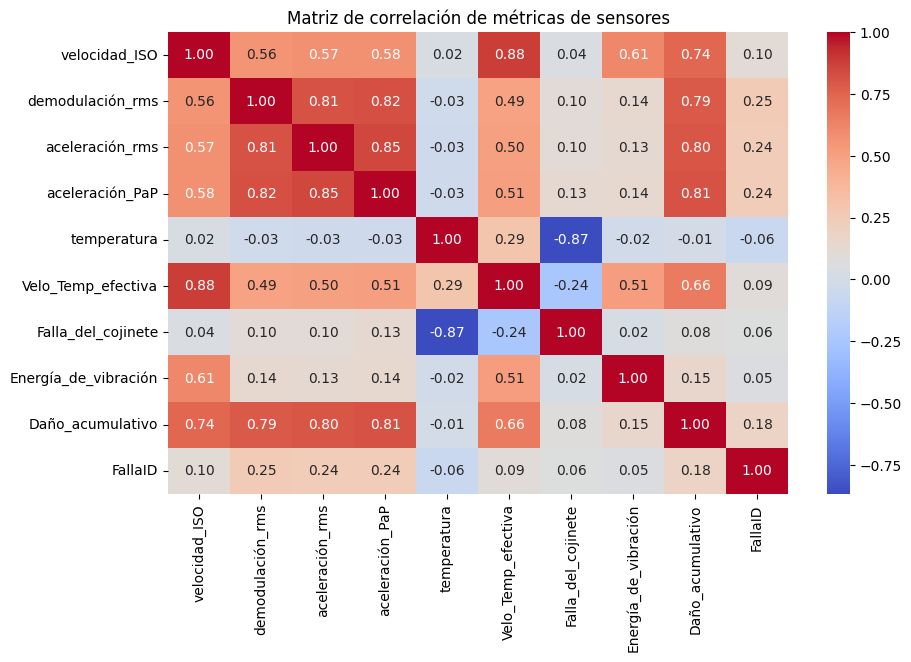

In [ ]:
# Failure Events

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Recuperar la columna desde la variable guardada
df_scaled['FallaID'] = Condicion  # Condicion = dataset.pop('Machine_ID')

#Análisis de correlación-Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(df_scaled.corr(), annot=True, cmap="RdBu", fmt='.2f', center=0, vmin=-1, vmax=1,
            #annot_kws={"size": 12}, linewidths=0.8, linecolor="black")
plt.title('Matriz de correlación de métricas de sensores')
plt.show()




# **ENTRENAMOS LA RED CON EL DATASET MODIFICADO**

In [ ]:
# @title

# DEFINIR CONJUNTO DE ENTRENAMIENTO 80% Y CONJUNTO DE TEST 20%  PARA TOMAR LA MUESTRA ALEATORIA
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
X_train = data.sample(frac=0.8,random_state=0)
X_test = data.drop(X_train.index)

# CORTAR LA CARACTERÍSTICA machine_ID DEL DATASET DE ENTRENAMIENTO Y TEST Y GUARDAR EN VARIABLE NUEVA
y_train = X_train.pop('FallaID')
y_test = X_test.pop('FallaID')




import numpy as np

# Enviar a GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convertir X_train y X_test a NumPy si aún no lo son
X_train_np = np.array(X_train) if not isinstance(X_train, np.ndarray) else X_train
X_test_np = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test

# Convertir y_train y y_test a NumPy
y_train_np = np.array(y_train) if not isinstance(y_train, np.ndarray) else y_train
y_test_np = np.array(y_test) if not isinstance(y_test, np.ndarray) else y_test

# Convertir a tensores de PyTorch y enviarlos a dispositivo
X_train_torch = torch.from_numpy(X_train_np).float().to(device)
y_train_torch = torch.from_numpy(y_train_np).float().unsqueeze(1).to(device)  # Agregar dimensión extra

X_test_torch = torch.from_numpy(X_test_np).float().to(device)
y_test_torch = torch.from_numpy(y_test_np).float().unsqueeze(1).to(device)  # Agregar dimensión extra

print(f"X_train_torch shape: {X_train_torch.shape}")  # Debe ser (N, num_features)
print(f"y_train_torch shape: {y_train_torch.shape}")  # Debe ser (N, 1)
print(f"X_test_torch shape: {X_test_torch.shape}")    # Debe ser (M, num_features)
print(f"y_test_torch shape: {y_test_torch.shape}")    # Debe ser (M, 1)

print(f"¿X_train_torch está en {X_train_torch.device}?")
print(f"¿y_train_torch está en {y_train_torch.device}?")



X_train_torch shape: torch.Size([4091, 9])
y_train_torch shape: torch.Size([4091, 1])
X_test_torch shape: torch.Size([1023, 9])
y_test_torch shape: torch.Size([1023, 1])
¿X_train_torch está en cpu?
¿y_train_torch está en cpu?


In [ ]:
# @title

# 🔹 2️⃣ DEFINIR CIRCUITO CUÁNTICO EN PENNYLANE
n_qubits = X_train.shape[1]  # Usamos tantos qubits como características

dev = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev, interface="torch", diff_method="parameter-shift") #parameter-shift, que permite calcular gradientes en circuitos cuánticos.
def quantum_circuit(inputs, weights):
    """Circuito cuántico que codifica los datos en qubits y realiza transformaciones"""
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)  # Codifica datos en rotaciones

     # 🔹 Agregar entrelazamiento entre qubits para mejorar el aprendizaje
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])  # Aplica CNOT entre qubits consecutivos

    # 🔹 Aplicar puertas de entrenamiento
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)

    #return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)] # Medir todos los qubits
    return qml.expval(qml.PauliZ(0))

def quantum_circuit_torch(inputs, weights):
    """Ejecuta el circuito cuántico y devuelve un tensor de PyTorch"""
    #output = quantum_circuit(inputs)  # Ejecutar el circuito
    return quantum_circuit(inputs, weights)  # Ya devuelve tensor con gradientes
    #return torch.tensor(output, dtype=torch.float32)  # Convertir a tensor

# 🔹 3️⃣ DEFINIR LA RED NEURONAL CUÁNTICA (QNN)
class QuantumNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_qubits, requires_grad=True))  # 🔹 Permitir gradientes
       # self.weight = nn.Parameter(0.01 * torch.randn(n_qubits,3))  # Pesos iniciales

    def forward(self, x):
        batch_size = x.shape[0]
        q_out = torch.zeros(batch_size, device=x.device)  # Mover a GPU si está disponible
        #q_out = torch.zeros(batch_size, n_qubits)  # Crear un tensor vacío


        for i in range(batch_size):
            q_out[i] = quantum_circuit_torch(x[i], self.weights)  # 🔹 Pasar weights al circuito
            #q_out[i] = torch.tensor(quantum_circuit_torch(x[i]), dtype=torch.float32) #Se procesa el batch completo de datos en lugar de uno por uno.

        return torch.sigmoid(q_out).unsqueeze(1)







In [ ]:
# @title
from torch.utils.data import DataLoader, TensorDataset
train_loader = DataLoader(train_dataset, batch_size=25, shuffle=True)
print(train_loader)




In [ ]:
# @title
num_batches = len(train_loader)
print(f"Total de batches en train_loader: {num_batches}")

Total de batches en train_loader: 164


In [ ]:
# 🔹 2️⃣ DEFINIR CIRCUITO CUÁNTICO EN PENNYLANE
#        Se crea un dispositivo cuántico simulado con tantos qubits como características tenga el dataset.

n_qubits = X_train.shape[1]  # Usamos tantos qubits como características

dev = qml.device("default.qubit", wires=n_qubits) #crea simulador cuántico que correrá los circuitos.
#qml.device(...): es la función que crea un "dispositivo cuántico" virtual
#"default.qubit": indica el tipo de simulador que se usará. En este caso:
#Es un simulador clásico que modela qubits como vectores de estado.
#No necesitas una computadora cuántica real; funciona en tu CPU.
#wires=n_qubits: define cuántos qubits (hilos/cuadrículas) tendrá tu circuito.

# 🔹 El circuito cuántico:

#  Codifica los datos como rotaciones (RY) en cada qubit.

#  Entrelaza los qubits para generar correlaciones.

#  Aplica puertas cuánticas con pesos entrenables.

#  Devuelve la expectativa de PauliZ sobre el primer qubit (una salida continua entre -1 y 1).


@qml.qnode(dev, interface="torch", diff_method="parameter-shift") #parameter-shift, que permite calcular gradientes en circuitos cuánticos.
#Este decorador transforma la función que define un circuito cuántico en un objeto ejecutable.
#Es necesario para que PennyLane pueda correr el circuito en un dispositivo (dev)
#y conectarlo a un framework como PyTorch o TensorFlow.

def quantum_circuit(inputs, weights):
    """Circuito cuántico que codifica los datos en qubits y realiza transformaciones"""
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)  # Codifica datos en rotaciones

     # 🔹 Agregar entrelazamiento entre qubits para mejorar el aprendizaje
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])  # Aplica CNOT entre quYbits consecutivos
        #qml.H(wires=i)
    # 🔹 Aplicar puertas de entrenamiento a pesos
    for i in range(n_qubits):
        #qml.RY(weights[i], wires=i)
        theta, phi, lam = weights[i]
        qml.U3(theta.item(), phi.item(), lam.item(), wires=i)


    # se colapsa/mide todos los qubits
    return qml.expval(qml.PauliZ(0))

def quantum_circuit_torch(inputs, weights):
    """Ejecuta el circuito cuántico y devuelve un tensor de PyTorch"""

    return quantum_circuit(inputs, weights)  # Ya devuelve tensor con gradientes


# 🔹 3️⃣ DEFINIR LA RED NEURONAL CUÁNTICA (QNN)
#  nn clase pytorch que permite construir modelos de redes neuronales
# Hereda de nn.Module (nn clase pytorch que permite construir modelos de redes neuronales)

# Tiene un solo conjunto de pesos cuánticos (1 por qubit).

# En el forward, ejecuta el circuito cuántico sobre cada ejemplo del lote.

# La salida es pasada por una sigmoide, ya que es un problema de clasificación binaria.
class QuantumNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_qubits,3, requires_grad=True))  # 🔹 Permitir gradientes AGTREGUE 3

    def forward(self, x):
        batch_size = x.shape[0]
        q_out = torch.zeros(batch_size, device=x.device)  # Crear un tensor vacío Y Mover a GPU si está disponible


        for i in range(batch_size):
            q_out[i] = quantum_circuit_torch(x[i], self.weights)  # 🔹 Pasar weights al circuito

        return torch.sigmoid(q_out).unsqueeze(1) #realiza dos operaciones sobre un tensor q_out en PyTorch
        #Aplica la función sigmoide elemento a elemento sobre q_out
        #Agrega con unsqueeze(1) una nueva dimensión en la posición 1:(batch_size, 1),útil para modelos que
        #esperan una forma específica, como al usar BCELoss






In [ ]:
from torch.utils.data import DataLoader, TensorDataset
# DataLoader: cargador de datos combina un conjunto de datos y un muestreador, y proporciona un iterable
#             sobre el conjunto de datos dado
# 🔹 4️⃣ ENTRENAR LA QNN
# *Optimización con Adam.
# *Función de pérdida entropía cruzada binaria (BCELoss) adecuada para clasificación binaria.
# *Crea mini-lotes de tamaño 25 para entrenamiento por lotes (batch training).
# *Entrena el modelo durante varias épocas, actualizando los pesos cuánticos usando backpropagation.
# *Se evalúa el modelo y se calcula la precisión final (accuracy).

model = QuantumNeuralNet()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)#utiliza como optimizador Adam, variante de descenso del gradiente
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)



loss_fn = nn.BCELoss()  # (Binary Cross Entropy para clasificación.No optimiza solo devuelve el valor del error)
# Asegurar que el modelo está en modo de entrenamiento
model.train()
# Asegurar que X_train_torch tenga gradientes
X_train_torch.requires_grad = True


# Crear dataset de PyTorch
train_dataset = TensorDataset(X_train_torch, y_train_torch)

# Dividir en lotes de 25 muestras
#batch_size = 25
train_loader = DataLoader(train_dataset, batch_size=25, shuffle=True)
#num_batches = len(train_loader)
# 🔹 ENTRENAR LA QNN con Mini-Batch Gradient Descent
# Definir la cantidad de épocas

epochs = 1
print("Entrenando red cuántica")
for epoch in range(epochs):
  print(f"Época {epoch+1}/{epochs}")
  total_loss = 0  # Para calcular el promedio de la pérdida en la época
  for i, (batch_X, batch_y) in enumerate(train_loader):  # 🔥 Se procesan lotes de 25 muestras
    optimizer.zero_grad()
    y_pred = model(batch_X)
    loss = loss_fn(y_pred, batch_y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    #y_pred = (y_pred.numpy() > 0.73).astype(int)
    #acc = accuracy_score(y_test_torch, y_pred)
    print(f"Lote de entrenamiento:🔹 {i+1} **loss: {loss.item():.4f}**")

  avg_loss = total_loss / len(train_loader)  # Pérdida promedio por mini-batch
  print(f"Época {epoch+1}/{epochs} - Pérdida promedio (avg_loss): {avg_loss:.4f}")

# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = (y_pred_testx.cpu().numpy() > 0.5).astype(int)

    #y_pred_test = (y_pred_testx.numpy() > 0.5).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")


Entrenando red cuántica
Época 1/1
Lote de entrenamiento:🔹 1 **loss: 0.6474**
Lote de entrenamiento:🔹 2 **loss: 0.9191**
Lote de entrenamiento:🔹 3 **loss: 0.8113**
Lote de entrenamiento:🔹 4 **loss: 0.7146**
Lote de entrenamiento:🔹 5 **loss: 0.8626**
Lote de entrenamiento:🔹 6 **loss: 0.7424**
Lote de entrenamiento:🔹 7 **loss: 0.8790**
Lote de entrenamiento:🔹 8 **loss: 0.6169**
Lote de entrenamiento:🔹 9 **loss: 0.6589**
Lote de entrenamiento:🔹 10 **loss: 0.8557**
Lote de entrenamiento:🔹 11 **loss: 0.9685**
Lote de entrenamiento:🔹 12 **loss: 0.7796**
Lote de entrenamiento:🔹 13 **loss: 0.8150**
Lote de entrenamiento:🔹 14 **loss: 0.7556**
Lote de entrenamiento:🔹 15 **loss: 0.9533**
Lote de entrenamiento:🔹 16 **loss: 0.6384**
Lote de entrenamiento:🔹 17 **loss: 0.7334**
Lote de entrenamiento:🔹 18 **loss: 0.8115**
Lote de entrenamiento:🔹 19 **loss: 0.7373**
Lote de entrenamiento:🔹 20 **loss: 0.7431**
Lote de entrenamiento:🔹 21 **loss: 0.8524**
Lote de entrenamiento:🔹 22 **loss: 0.8102**
Lote de

In [ ]:
#>= 0.27
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = ((y_pred_testx.cpu().numpy() >= 0.27).astype(int)

    #y_pred_test = (y_pred_testx.numpy() > 0.5).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")


predicciones:

🔹 **Precisión Final del modelo cuántico: 0.5973**


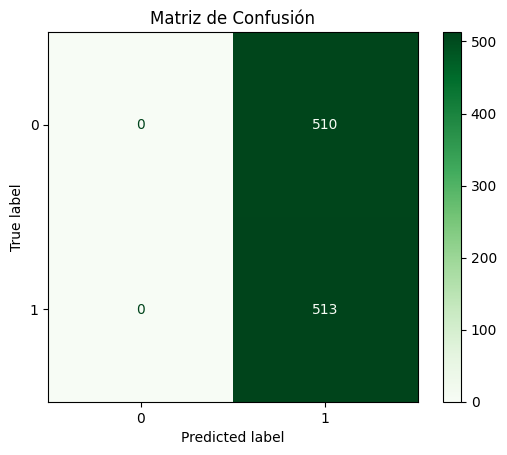

In [ ]:
# @title
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
# @title
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[0, 510],  # Fila 1: [VN, FP]
               [0, 513]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $5,100,000
Beneficio total: $15,390,000
Ganancia neta: $10,290,000


🔹 **Precisión Final del modelo cuántico: 0.5806**

In [ ]:
#< 0.69) OR >= 0.71) mismo rango que da los mejores resultados economicos cerca del >0.2
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = ((y_pred_testx.cpu().numpy() < 0.69) | (y_pred_testx.cpu().numpy() >= 0.71)).astype(int)

    #y_pred_test = (y_pred_testx.numpy() > 0.5).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")


predicciones:

🔹 **Precisión Final del modelo cuántico: 0.5973**


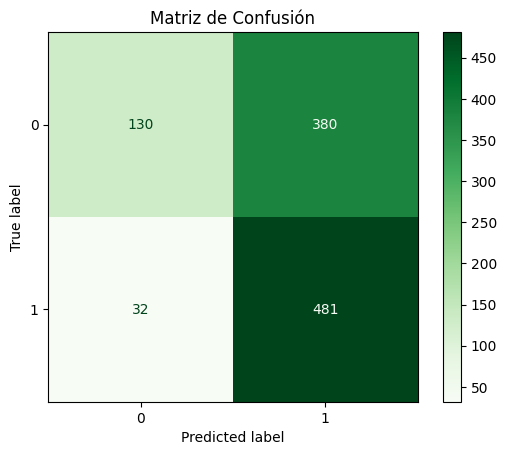

In [ ]:
# @title
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
# @title
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[130, 380],  # Fila 1: [VN, FP]
               [32, 481]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $5,400,000
Beneficio total: $15,080,000
Ganancia neta: $9,680,000


In [ ]:
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch)
    y_pred_test = (y_pred_testx.cpu().numpy() >= 0.70).astype(int)

    #y_pred_test = (y_pred_testx.numpy() > 0.5).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu


    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")


predicciones:

🔹 **Precisión Final del modelo cuántico: 0.5103**


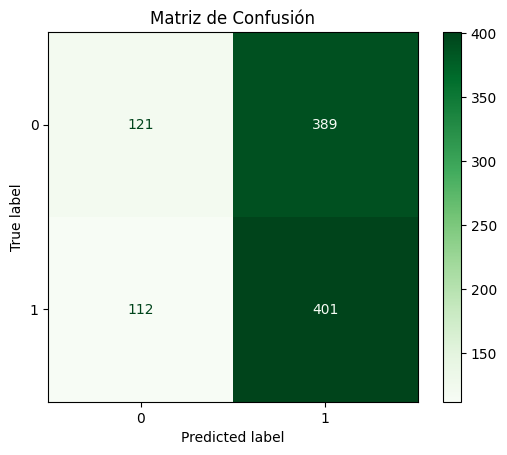

In [ ]:
# >=70
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
# @title
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[121, 369],  # Fila 1: [VN, FP]
               [112, 401]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $9,290,000
Beneficio total: $12,635,000
Ganancia neta: $3,345,000


In [ ]:
#>0.3
with torch.no_grad():
    print("predicciones:")
    y_pred_test = model(X_test_torch).float()
    y_pred_test = (y_pred_test.numpy() > 0.3).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu

    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.4976**


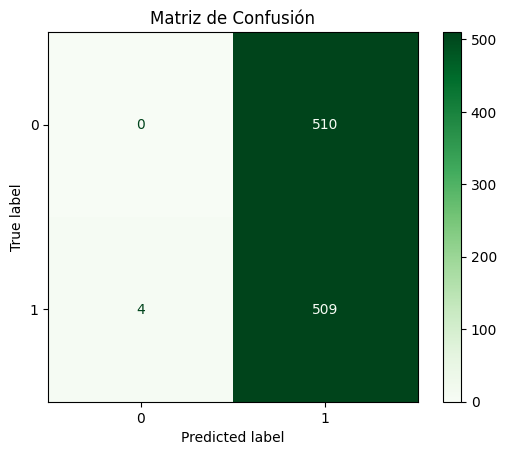

In [ ]:
# >0.3
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
# >0.3
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[0, 510],  # Fila 1: [VN, FP]
               [4, 509]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $5,300,000
Beneficio total: $15,270,000
Ganancia neta: $9,970,000


# **Conclusiones:**
1)-El modelo de red neuronal clásica es mejor para este par de bombas analizadas y es evidente, que el mantenimiento predictivo de las mismas en esta planta genera amplios beneficios para la empresa. Además, esta conclusión se puede generalizar, en base a conocimiento teórico y empírico, para cualquier planta industrial.

2)-La red neuronal cuántica entrenada con este datasets necesita menos épocas de entrenamiento para llegar a una mayor eficiencia y eficacia en cuánto a tiempo y capacidad de procesamiento.
 ejemplo problemas de visión artificial y problemas de finanzas; específicamente predicciones en la bolsa, cuyos procesos son altamente azarosos y por tanto, manejan  variables de relaciones altamente complejas, con ruidos y poca o nula correlación, dada la cantidad de incertidumbre involucrada.

#**Red cuántica con nuevo dataset de Bombas centrífugas (balanceado y reducido a 5000 muestras) y con características no lineales**

In [ ]:
df = pd.read_csv("CPumps.csv")
data = df
df

,vibration,temperature,flow_rate,pressure,power_consumption,failure
0,11.962924,75.387272,332.836525,11.573970,7.021113,1
1,3.465357,63.693726,414.291895,12.457984,4.869075,0
2,5.564621,57.512309,289.418945,8.014452,4.484585,0
3,10.701450,70.195937,317.912275,8.445960,7.227257,1
4,17.066633,78.149525,391.454266,10.661406,6.833283,1
...,...,...,...,...,...,...
4995,12.983637,76.788895,359.356449,7.361813,7.941949,1
4996,5.102382,57.381611,359.234393,10.227139,5.273487,0
4997,17.818486,69.607469,293.252635,10.306254,7.523854,1
4998,5.836209,58.922345,268.733557,9.044526,5.658807,0


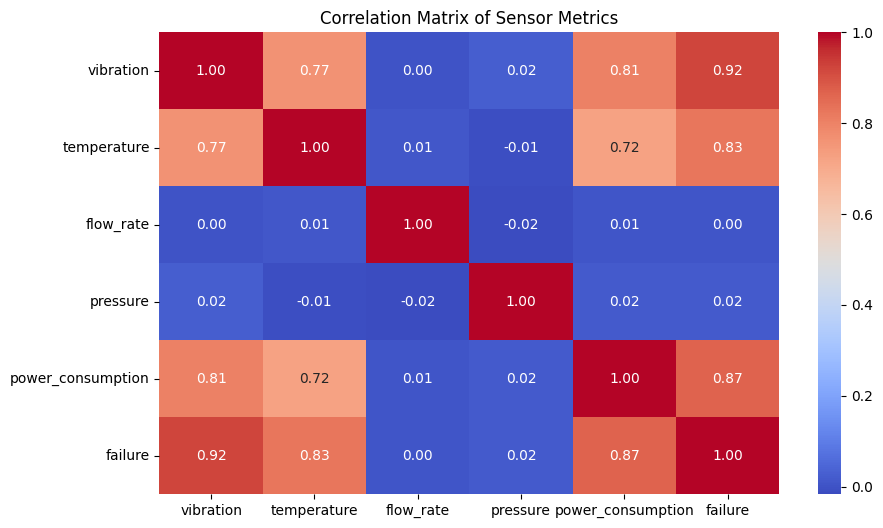

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sensor Metrics')
plt.show()

# Anomaly Detection using PCA (for multivariate analysis)
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['failure']))


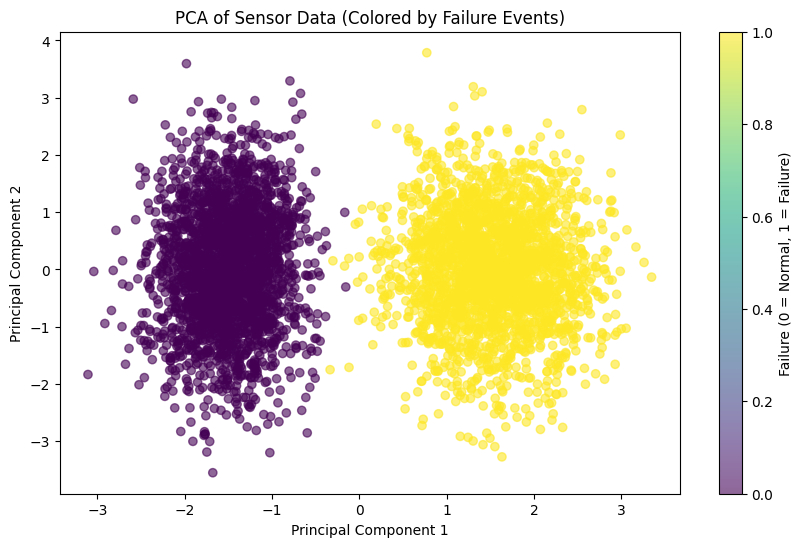

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['failure'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Failure (0 = Normal, 1 = Failure)')
plt.title('PCA of Sensor Data (Colored by Failure Events)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [ ]:
#Entrenamos red con nuevos datos no lineales


# **Entrenamos la red con nuevos datos no lineales**

In [ ]:
# @title
from torch.utils.data import DataLoader, TensorDataset
# DEFINIR CONJUNTO DE ENTRENAMIENTO 80% Y CONJUNTO DE TEST 20%  PARA TOMAR LA MUESTRA ALEATORIA
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
X_train = data.sample(frac=0.8,random_state=0)
X_test = data.drop(X_train.index)


# CORTAR LA CARACTERÍSTICA machine_ID DEL DATASET DE ENTRENAMIENTO Y TEST Y GUARDAR EN VARIABLE NUEVA
y_train = X_train.pop('failure')
y_test = X_test.pop('failure')



# 🔹 Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


import numpy as np

# Enviar a GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convertir X_train y X_test a NumPy si aún no lo son
X_train_np = np.array(X_train) if not isinstance(X_train, np.ndarray) else X_train
X_test_np = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test

# Convertir y_train y y_test a NumPy
y_train_np = np.array(y_train) if not isinstance(y_train, np.ndarray) else y_train
y_test_np = np.array(y_test) if not isinstance(y_test, np.ndarray) else y_test

# Convertir a tensores de PyTorch y enviarlos a dispositivo
X_train_torch = torch.from_numpy(X_train_np).float().to(device)
y_train_torch = torch.from_numpy(y_train_np).float().unsqueeze(1).to(device)  # Agregar dimensión extra

X_test_torch = torch.from_numpy(X_test_np).float().to(device)
y_test_torch = torch.from_numpy(y_test_np).float().unsqueeze(1).to(device)  # Agregar dimensión extra

print(f"X_train_torch shape: {X_train_torch.shape}")  # Debe ser (N, num_features)
print(f"y_train_torch shape: {y_train_torch.shape}")  # Debe ser (N, 1)
print(f"X_test_torch shape: {X_test_torch.shape}")    # Debe ser (M, num_features)
print(f"y_test_torch shape: {y_test_torch.shape}")    # Debe ser (M, 1)

print(f"¿X_train_torch está en {X_train_torch.device}?")
print(f"¿y_train_torch está en {y_train_torch.device}?")



X_train_torch shape: torch.Size([4000, 5])
y_train_torch shape: torch.Size([4000, 1])
X_test_torch shape: torch.Size([1000, 5])
y_test_torch shape: torch.Size([1000, 1])
¿X_train_torch está en cpu?
¿y_train_torch está en cpu?


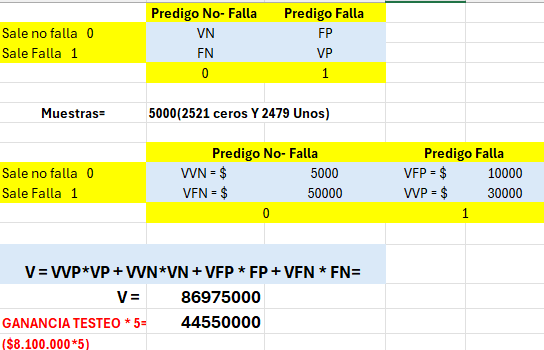

cambie el set de testeo y el de pred por rango >.60

In [ ]:
# @title

# 🔹 2️⃣ DEFINIR CIRCUITO CUÁNTICO EN PENNYLANE
n_qubits = X_train.shape[1]  # Usamos tantos qubits como características

dev = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev, interface="torch", diff_method="parameter-shift") #parameter-shift, que permite calcular gradientes en circuitos cuánticos.
def quantum_circuit(inputs, weights):
    """Circuito cuántico que codifica los datos en qubits y realiza transformaciones"""
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)  # Codifica datos en rotaciones

     # 🔹 Agregar entrelazamiento entre qubits para mejorar el aprendizaje
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])  # Aplica CNOT entre qubits consecutivos

    # 🔹 Aplicar puertas de entrenamiento
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)

    #return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)] # Medir todos los qubits
    return qml.expval(qml.PauliZ(0))

def quantum_circuit_torch(inputs, weights):
    """Ejecuta el circuito cuántico y devuelve un tensor de PyTorch"""
    #output = quantum_circuit(inputs)  # Ejecutar el circuito
    return quantum_circuit(inputs, weights)  # Ya devuelve tensor con gradientes
    #return torch.tensor(output, dtype=torch.float32)  # Convertir a tensor

# 🔹 3️⃣ DEFINIR LA RED NEURONAL CUÁNTICA (QNN)
class QuantumNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_qubits, requires_grad=True))  # 🔹 Permitir gradientes
       # self.weight = nn.Parameter(0.01 * torch.randn(n_qubits,3))  # Pesos iniciales

    def forward(self, x):
        batch_size = x.shape[0]
        q_out = torch.zeros(batch_size, device=x.device)  # Mover a GPU si está disponible
        #q_out = torch.zeros(batch_size, n_qubits)  # Crear un tensor vacío


        for i in range(batch_size):
            q_out[i] = quantum_circuit_torch(x[i], self.weights)  # 🔹 Pasar weights al circuito
            #q_out[i] = torch.tensor(quantum_circuit_torch(x[i]), dtype=torch.float32) #Se procesa el batch completo de datos en lugar de uno por uno.

        return torch.sigmoid(q_out).unsqueeze(1)



# **>0.5**

In [ ]:
# @title
from torch.utils.data import DataLoader, TensorDataset
# 🔹 4️⃣ ENTRENAR LA QNN
model = QuantumNeuralNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()  # (Binary Cross Entropy para clasificación)
# Asegurar que el modelo está en modo de entrenamiento
model.train()
# Asegurar que X_train_torch tenga gradientes
X_train_torch.requires_grad = True

# Definir la cantidad de épocas

# Crear dataset de PyTorch
train_dataset = TensorDataset(X_train_torch, y_train_torch)

# Dividir en lotes de 25 muestras
#batch_size = 25
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
#num_batches = len(train_loader)
# 🔹 ENTRENAR LA QNN con Mini-Batch Gradient Descent
epochs = 1
print("Entrenando red cuántica")
for epoch in range(epochs):
  print(f"Época {epoch+1}/{epochs}")
  total_loss = 0  # Para calcular el promedio de la pérdida en la época
  for i, (batch_X, batch_y) in enumerate(train_loader):  # 🔥 Se procesan lotes de 25 muestras
    optimizer.zero_grad()
    y_pred = model(batch_X)
    loss = loss_fn(y_pred, batch_y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    #y_pred = (y_pred.numpy() > 0.5).astype(int)
    #acc = accuracy_score(y_test_torch, y_pred)
    print(f"Lote de entrenamiento:🔹 {i+1} **loss: {loss.item():.4f}**")

  avg_loss = total_loss / len(train_loader)  # Pérdida promedio por mini-batch
  print(f"Época {epoch+1}/{epochs} - Pérdida promedio (avg_loss): {avg_loss:.4f}")

# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch).float()
    y_pred_test = (y_pred_testx.numpy() > 0.5).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.4).astype(int) #para gpu
    #y_test_torch= (y_test_torch.numpy() > 0.6).astype(int)
    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

Entrenando red cuántica
Época 1/1
Lote de entrenamiento:🔹 1 **loss: 0.7546**
Lote de entrenamiento:🔹 2 **loss: 0.7745**
Lote de entrenamiento:🔹 3 **loss: 0.8415**
Lote de entrenamiento:🔹 4 **loss: 0.7546**
Lote de entrenamiento:🔹 5 **loss: 0.7691**
Lote de entrenamiento:🔹 6 **loss: 0.7415**
Lote de entrenamiento:🔹 7 **loss: 0.7694**
Lote de entrenamiento:🔹 8 **loss: 0.7658**
Lote de entrenamiento:🔹 9 **loss: 0.7631**
Lote de entrenamiento:🔹 10 **loss: 0.7567**
Lote de entrenamiento:🔹 11 **loss: 0.7297**
Lote de entrenamiento:🔹 12 **loss: 0.7753**
Lote de entrenamiento:🔹 13 **loss: 0.6904**
Lote de entrenamiento:🔹 14 **loss: 0.7707**
Lote de entrenamiento:🔹 15 **loss: 0.7234**
Lote de entrenamiento:🔹 16 **loss: 0.7447**
Lote de entrenamiento:🔹 17 **loss: 0.7539**
Lote de entrenamiento:🔹 18 **loss: 0.7376**
Lote de entrenamiento:🔹 19 **loss: 0.7808**
Lote de entrenamiento:🔹 20 **loss: 0.7547**
Lote de entrenamiento:🔹 21 **loss: 0.7312**
Lote de entrenamiento:🔹 22 **loss: 0.7411**
Lote de

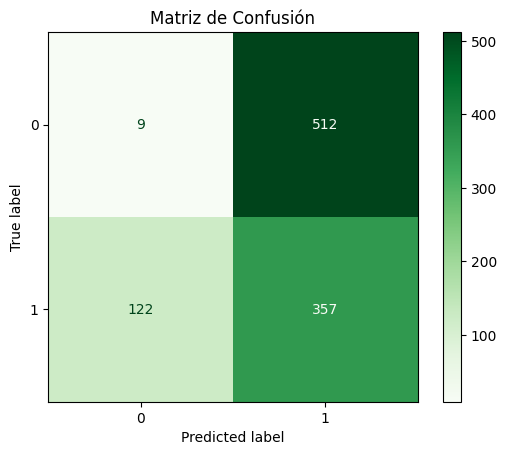

In [ ]:
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
# @title
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[9, 512],  # Fila 1: [VN, FP]
              [122, 357]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $11,220,000
Beneficio total: $10,755,000
Ganancia neta: $-465,000


# **con >0.4**

In [ ]:

# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO >0.4
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch).float()
    y_pred_test = (y_pred_testx.numpy() > 0.4).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.4).astype(int) #para gpu
    #y_test_torch= (y_test_torch.numpy() > 0.6).astype(int)
    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.4640**



🔹 **Precisión Final del modelo cuántico: 0.4640**

In [ ]:
# @title
(y_pred_test == 0).sum()

np.int64(509)

In [ ]:
# @title
(y_pred_test == 1).sum()

np.int64(491)

In [ ]:
# @title

(y_test_torch <= 0.6).sum()

np.int64(521)

In [ ]:
# @title
(y_pred_testx <= 0.6).sum()

tensor(528)

In [ ]:
# @title
y_pred_testx

tensor([[0.6830],
        [0.6453],
        [0.5302],
        [0.5938],
        [0.6052],
        [0.6591],
        [0.6124],
        [0.6821],
        [0.6669],
        [0.5420],
        [0.5867],
        [0.7195],
        [0.4488],
        [0.6805],
        [0.7059],
        [0.3642],
        [0.5992],
        [0.5977],
        [0.6155],
        [0.7007],
        [0.3740],
        [0.6435],
        [0.5007],
        [0.6569],
        [0.5397],
        [0.5547],
        [0.6875],
        [0.4068],
        [0.6626],
        [0.7171],
        [0.5841],
        [0.4793],
        [0.6302],
        [0.4919],
        [0.5486],
        [0.6465],
        [0.6158],
        [0.6632],
        [0.6151],
        [0.6719],
        [0.5836],
        [0.6062],
        [0.6689],
        [0.6260],
        [0.6888],
        [0.5113],
        [0.5339],
        [0.4898],
        [0.6356],
        [0.6274],
        [0.5708],
        [0.6221],
        [0.5268],
        [0.6619],
        [0.7066],
        [0

In [ ]:
# @title
y_test_torch

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
      

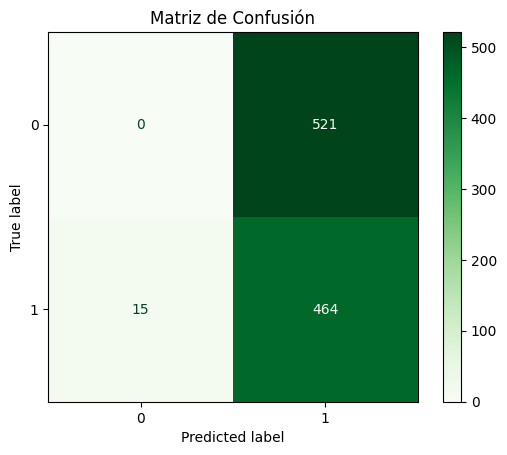

In [ ]:
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


**Para analizar el costo-beneficio basado en la matriz de confusión, primero identificamos los casos:**

•	Verdaderos Positivos-Beneficio alto (VP = 464): La bomba es propensa a refacción y el modelo la clasifica correctamente.

•	Falsos Positivos-Costo medio (FP = 521): La bomba es óptima, pero el modelo la clasifica como propensa a refacción.

•	Falsos Negativos-costo alto(FN = 15): La bomba es propensa a refacción, pero el modelo la clasifica como óptima.

•	Verdaderos Negativos -Beneficio medio(VN = 0): La bomba es óptima y el modelo la clasifica correctamente.



In [ ]:
# @title
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[0, 521],  # Fila 1: [VN, FP]
              [15, 464]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $5,960,000
Beneficio total: $13,920,000
Ganancia neta: $7,960,000


# **con >0.6**

In [ ]:
# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_testx = model(X_test_torch).float()
    y_pred_test = (y_pred_testx.numpy() > 0.6).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.4).astype(int) #para gpu
    #y_test_torch= (y_test_torch.numpy() > 0.6).astype(int)
    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.5440**


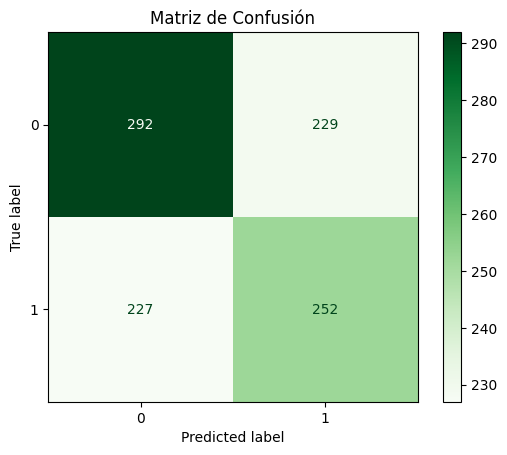

In [ ]:
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[292, 229],  # Fila 1: [VN, FP]
              [227, 252]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $13,640,000
Beneficio total: $9,020,000
Ganancia neta: $-4,620,000


# **con >0.4 se logra la mayor ganacia neta : $7,960,000**

In [ ]:
# @title
#volvemos con dataset sintetico balanceado de bombas , balanceando solo el set de testeo para probar que sucede


In [ ]:
# @title
data = pd.read_csv("SetTesteo.csv")
data = data.dropna(axis=1)
X_trainIn = data.sample(frac=0.0,random_state=0)
X_testIn = data.drop(X_trainIn.index)
X_testIn

,vibration,temperature,flow_rate,pressure,power_consumption,failure
0,13.535443,73.168231,233.523220,9.758475,6.338338,1
1,11.198868,74.196602,314.565844,11.012057,6.749117,1
2,12.014959,77.256026,308.110945,10.513666,6.978020,1
3,13.423830,75.010338,319.376878,11.760835,6.769010,1
4,19.077948,72.791620,337.340433,9.766043,8.589065,1
...,...,...,...,...,...,...
805,4.097948,61.316797,266.063320,12.321917,5.397175,0
806,4.130337,62.626709,278.687262,12.041548,4.538693,0
807,4.099379,56.987975,186.964026,8.393451,4.850771,0
808,3.997813,54.793512,304.017259,11.274086,5.159408,0


In [ ]:
# @title

# CORTAR LA CARACTERÍSTICA machine_ID DEL DATASET DE ENTRENAMIENTO Y TEST Y GUARDAR EN VARIABLE NUEVA


#y_train = X_trainIn.pop('failure')
y_test = X_testIn.pop('failure')



# 🔹 Normalizar los datos
#scaler = StandardScaler()

X_test = scaler.transform(X_testIn)


import numpy as np

# Enviar a GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convertir X_train y X_test a NumPy si aún no lo son

X_test_np = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test

# Convertir y_train y y_test a NumPy

y_test_np = np.array(y_test) if not isinstance(y_test, np.ndarray) else y_test

# Convertir a tensores de PyTorch y enviarlos a dispositivo


X_test_torch = torch.from_numpy(X_test_np).float().to(device)
y_test_torch = torch.from_numpy(y_test_np).float().unsqueeze(1).to(device)  # Agregar dimensión extra

print(f"X_test_torch shape: {X_test_torch.shape}")    # Debe ser (M, num_features)
print(f"y_test_torch shape: {y_test_torch.shape}")    # Debe ser (M, 1)






X_test_torch shape: torch.Size([810, 5])
y_test_torch shape: torch.Size([810, 1])


In [ ]:
# >0.5
# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_test = model(X_test_torch).float()
    y_pred_test = (y_pred_test.numpy() > 0.5).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu

    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.3864**


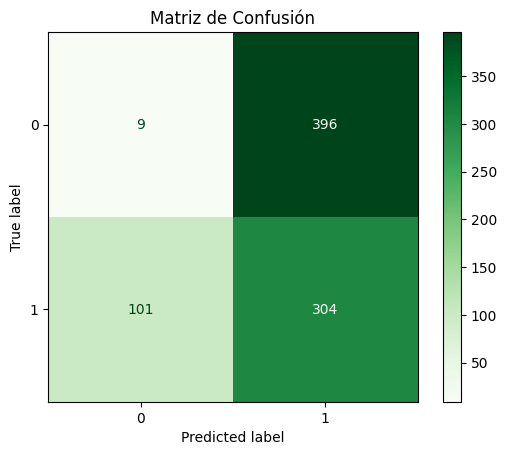

In [ ]:
# @title
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()

##peor sube el falso negativo

In [ ]:
# @title
#>0.5 y balanceados 810
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[9, 396],  # Fila 1: [VN, FP]
               [101, 304]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $9,010,000
Beneficio total: $9,165,000
Ganancia neta: $155,000


In [ ]:
#>0.4 y balanceados 810
# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_test = model(X_test_torch).float()
    y_pred_test = (y_pred_test.numpy() > 0.4).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu

    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.4617**


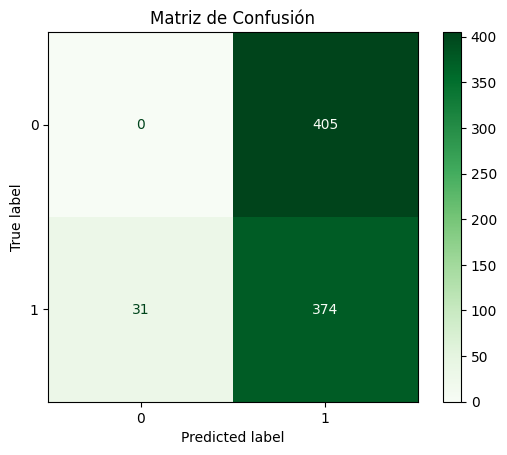

In [ ]:
# @title
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()

##peor sube el falso negativo

In [ ]:
# @title
#>0.4 y balanceados 810
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[390, 15],  # Fila 1: [VN, FP]
               [165, 240]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $8,400,000
Beneficio total: $9,150,000
Ganancia neta: $750,000


In [ ]:
# >0.3 y balanceados 810
# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_test = model(X_test_torch).float()
    y_pred_test = (y_pred_test.numpy() > 0.3).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu

    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.5000**


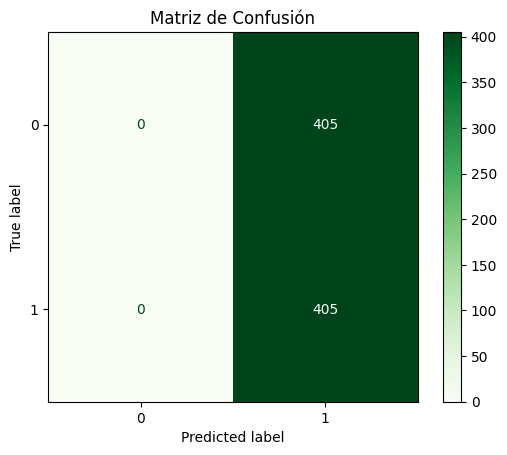

In [ ]:
#>0.3 y balanceados 810
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()

##peor sube el falso negativo

In [ ]:
# >0.2
# 🔹 5️⃣ EVALUAR EL MODELO CUÁNTICO
with torch.no_grad():
    print("predicciones:")
    y_pred_test = model(X_test_torch).float()
    y_pred_test = (y_pred_test.numpy() > 0.2).astype(int) #para cpu
    #y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int) #para gpu

    acc = accuracy_score(y_test_torch, y_pred_test)
    print(f"\n🔹 **Precisión Final del modelo cuántico: {acc:.4f}**")

predicciones:

🔹 **Precisión Final del modelo cuántico: 0.5000**


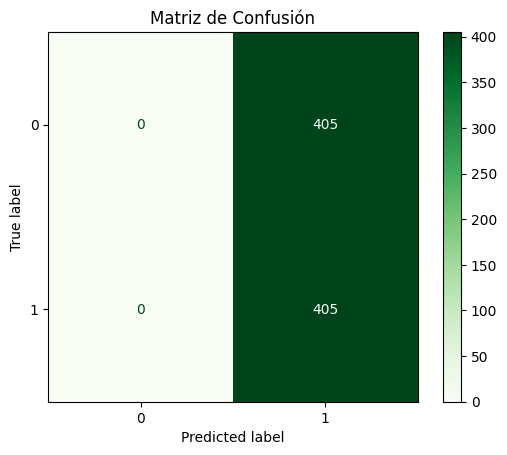

In [ ]:
# @title
cm = confusion_matrix(y_test_torch, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión")
plt.show()

##peor sube el falso negativo

In [ ]:
# @title
#>0.2 y >0.3 balanceados 810
import numpy as np

# Matriz de confusión (de la imagen proporcionada)
cm = np.array([[0, 405],  # Fila 1: [VN, FP]
               [0, 405]])  # Fila 2: [FN, VP]

# Extraer valores de la matriz de confusión
VN, FP = cm[0, 0], cm[0, 1]  # Verdaderos Negativos y Falsos Positivos
FN, VP = cm[1, 0], cm[1, 1]  # Falsos Negativos y Verdaderos Positivos

# Definir costos y beneficios (en dólares por caso)
costo_FN = 50000  # Cada FN cuesta $50,000
costo_FP = 10000  # Cada FP cuesta $10,000
beneficio_VP = 30000  # Cada VP ahorra $30,000
beneficio_VN = 5000  # Cada VN ahorra $5,000

# Cálculo de costos y beneficios totales
costo_total = (FN * costo_FN) + (FP * costo_FP)
beneficio_total = (VP * beneficio_VP) + (VN * beneficio_VN)
ganancia_neta = beneficio_total - costo_total

# Mostrar resultados
print(f"Costo total: ${costo_total:,}")
print(f"Beneficio total: ${beneficio_total:,}")
print(f"Ganancia neta: ${ganancia_neta:,}")


Costo total: $4,050,000
Beneficio total: $12,150,000
Ganancia neta: $8,100,000


# **Conclusiones:**
1)-El modelo de red neuronal clásica es mejor para este par de bombas analizadas y es evidente, que el mantenimiento predictivo de las mismas en esta planta genera amplios beneficios para la empresa. Además, esta conclusión se puede generalizar, en base a conocimiento teórico y empírico, para cualquier planta industrial.

2)-La red neuronal cuántica entrenada con el segundo datasets necesita menos épocas de entrenamiento para llegar a una mayor eficiencia y eficacia en cuánto a tiempo y capacidad de procesamiento. Podemos deducir además, con este trabajo, que las diferencias serán mayores cuándo se trabaje con datasets muy complejos, con poca o nada de correlatividad, como por ejemplo problemas de visión artificial y problemas de finanzas; específicamente predicciones en la bolsa, cuyos procesos son altamente azarosos y por tanto, manejan  variables de relaciones altamente complejas, con ruidos y poca o nula correlación, dada la cantidad de incertidumbre involucrada.